### Cell 1: Imports and Data Loading
Start by importing all the necessary libraries and loading your CSV file into a Pandas DataFrame.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Load your dataset
df = pd.read_csv('../data/sri_lanka_locations.csv')

# Display the first few rows to make sure it loaded correctly
df.head()

,location_id,name,province,city,primary_category,secondary_tags,description,avg_time_hours,best_season,difficulty,entry_fee_required,popularity_score,latitude,longitude
0,1,Galle Fort,Southern Province,Galle,History,"culture,food,walk,scenic",Explore the Dutch colonial-era fort with bouti...,4.5,Year-round,Easy,False,9,6.026,80.217
1,2,Unawatuna Beach,Southern Province,Unawatuna,Beach,"relax,swim,food,wildlife",A popular crescent-shaped beach known for its ...,5.0,Nov-Apr,Easy,False,8,6.011,80.248
2,3,Yala National Park,Southern Province,Tissamaharama,Nature,"wildlife,safari,scenic",Famous for having one of the highest leopard d...,6.0,Feb-Jul,NaN,True,9,6.283,81.516
3,4,Temple of the Tooth,Central Province,Kandy,Culture,"history,religion,scenic",A sacred Buddhist temple that houses the relic...,2.5,Year-round,Easy,True,10,7.293,80.641
4,5,Sigiriya Rock,Central Province,Dambulla,History,"hike,nature,culture,scenic",An ancient rock fortress with stunning frescoe...,4.0,"Jan-Apr, Jul-Sep",Challenging,True,10,7.957,80.760


## 1. Distribution of Location Categories

To understand our dataset better, let's visualize the frequency of each category tag. This will show us what kind of tourist locations are most common in our data. A horizontal bar chart is ideal for this.

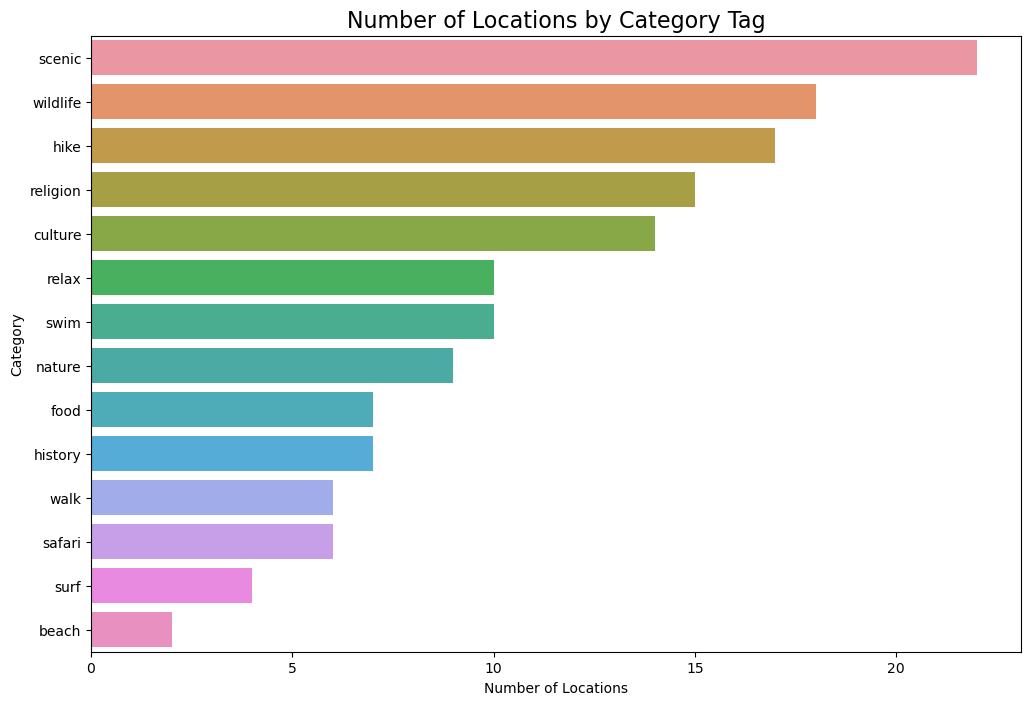

In [2]:
# Process the tags
all_tags = []
df['secondary_tags'].dropna().apply(lambda x: all_tags.extend([tag.strip() for tag in x.split(',')]))
tag_counts = Counter(all_tags)
tags_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values('Count', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Tag', data=tags_df)
plt.title('Number of Locations by Category Tag', fontsize=16)
plt.xlabel('Number of Locations')
plt.ylabel('Category')
plt.show()

## 2. Visualizing a Sample Itinerary on a Map

Now, let's test our itinerary generation logic and visualize the output. We'll simulate a user who is interested in `history` and `culture` in the `Central Province` and plot the recommended locations on a map.

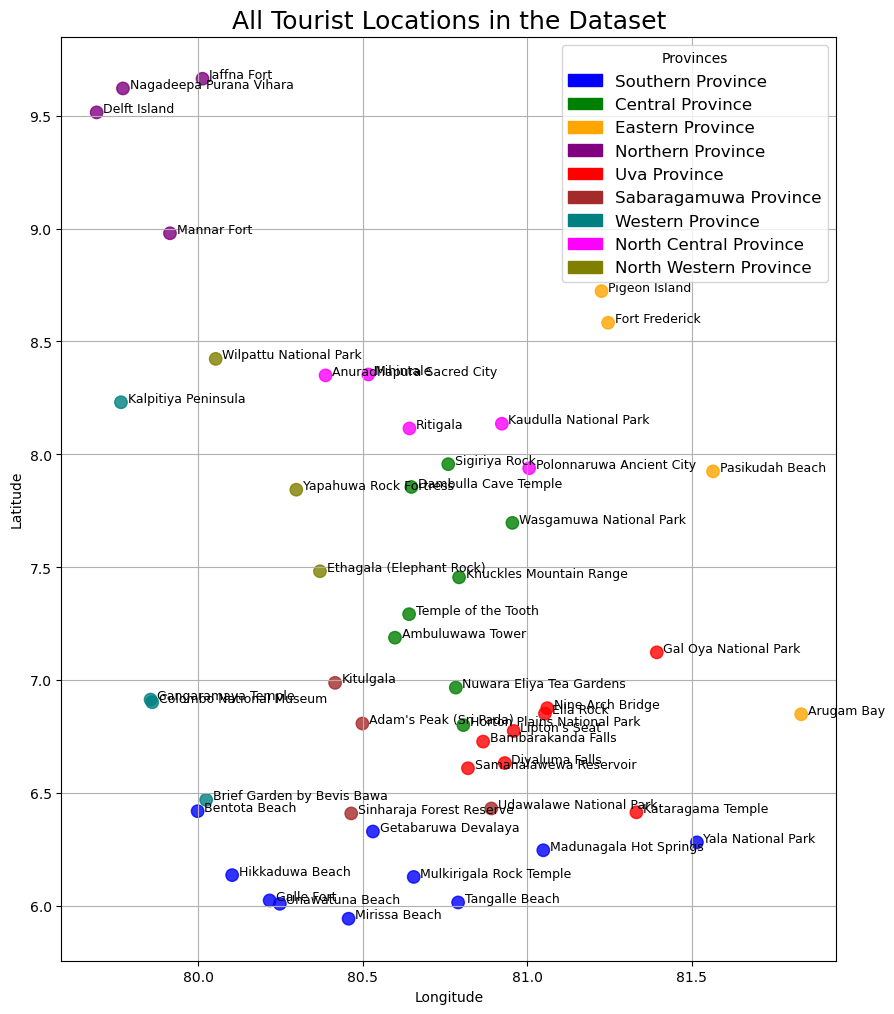

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Needed for the custom legend

# Load your dataset
df = pd.read_csv('../data/sri_lanka_locations.csv')

# --- Create a Color Map for Provinces ---
# This dictionary assigns a specific color to each unique province
# Replace your old dictionary with this complete one

province_colors = {
    'Southern Province': 'blue',
    'Central Province': 'green',
    'Eastern Province': 'orange',
    'Northern Province': 'purple',
    'Uva Province': 'red',
    'Sabaragamuwa Province': 'brown',
    'Western Province': 'teal',
    'North Central Province': 'magenta',
    'North Western Province': 'olive'
}

# Now, when you run this line again, there will be no NaN values
df['color'] = df['province'].map(province_colors)
# Add a 'color' column to the DataFrame based on the province
df['color'] = df['province'].map(province_colors)

# --- Plotting the Map ---
plt.figure(figsize=(10, 12))
plt.title('All Tourist Locations in the Dataset', fontsize=18)

# Use the new 'color' column to color-code the dots
plt.scatter(df['longitude'], df['latitude'], c=df['color'], s=80, alpha=0.8)

# --- Add a Custom Legend ---
legend_handles = [mpatches.Patch(color=color, label=province) for province, color in province_colors.items()]
plt.legend(handles=legend_handles, title="Provinces", fontsize=12)

# Add labels to each point
for index, row in df.iterrows():
    plt.text(row['longitude'] + 0.02, row['latitude'], row['name'], fontsize=9)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
# plt.savefig('full_dataset_map.png') # Save the plot for your slides
plt.show()

## 3. Comprehensive Data Visualizations

Let's explore our Sri Lankan tourism dataset through various visualizations to understand patterns, distributions, and relationships in the data.

In [4]:
# First, let's load the travel times data as well
travel_df = pd.read_csv('../data/travel_times.csv')

# Display basic information about both datasets
print("=== LOCATIONS DATA ===")
print(f"Total locations: {len(df)}")
print(f"Columns: {list(df.columns)}")
print(f"Provinces: {df['province'].nunique()}")
print(f"Cities: {df['city'].nunique()}")
print(f"Primary categories: {df['primary_category'].unique()}")

print("\n=== TRAVEL TIMES DATA ===")
print(f"Total routes: {len(travel_df)}")
print(f"Unique cities: {len(set(travel_df['origin_city'].unique().tolist() + travel_df['destination_city'].unique().tolist()))}")
print(f"Average travel time: {travel_df['travel_time_hours'].mean():.2f} hours")
print(f"Max travel time: {travel_df['travel_time_hours'].max():.1f} hours")
print(f"Min travel time: {travel_df['travel_time_hours'].min():.1f} hours")

=== LOCATIONS DATA ===
Total locations: 50
Columns: ['location_id', 'name', 'province', 'city', 'primary_category', 'secondary_tags', 'description', 'avg_time_hours', 'best_season', 'difficulty', 'entry_fee_required', 'popularity_score', 'latitude', 'longitude', 'color']
Provinces: 9
Cities: 45
Primary categories: ['History' 'Beach' 'Nature' 'Culture' 'Scenic' 'Adventure' 'Relax']

=== TRAVEL TIMES DATA ===
Total routes: 353
Unique cities: 65
Average travel time: 2.52 hours
Max travel time: 8.0 hours
Min travel time: 0.2 hours


### 3.1 Province Distribution Analysis

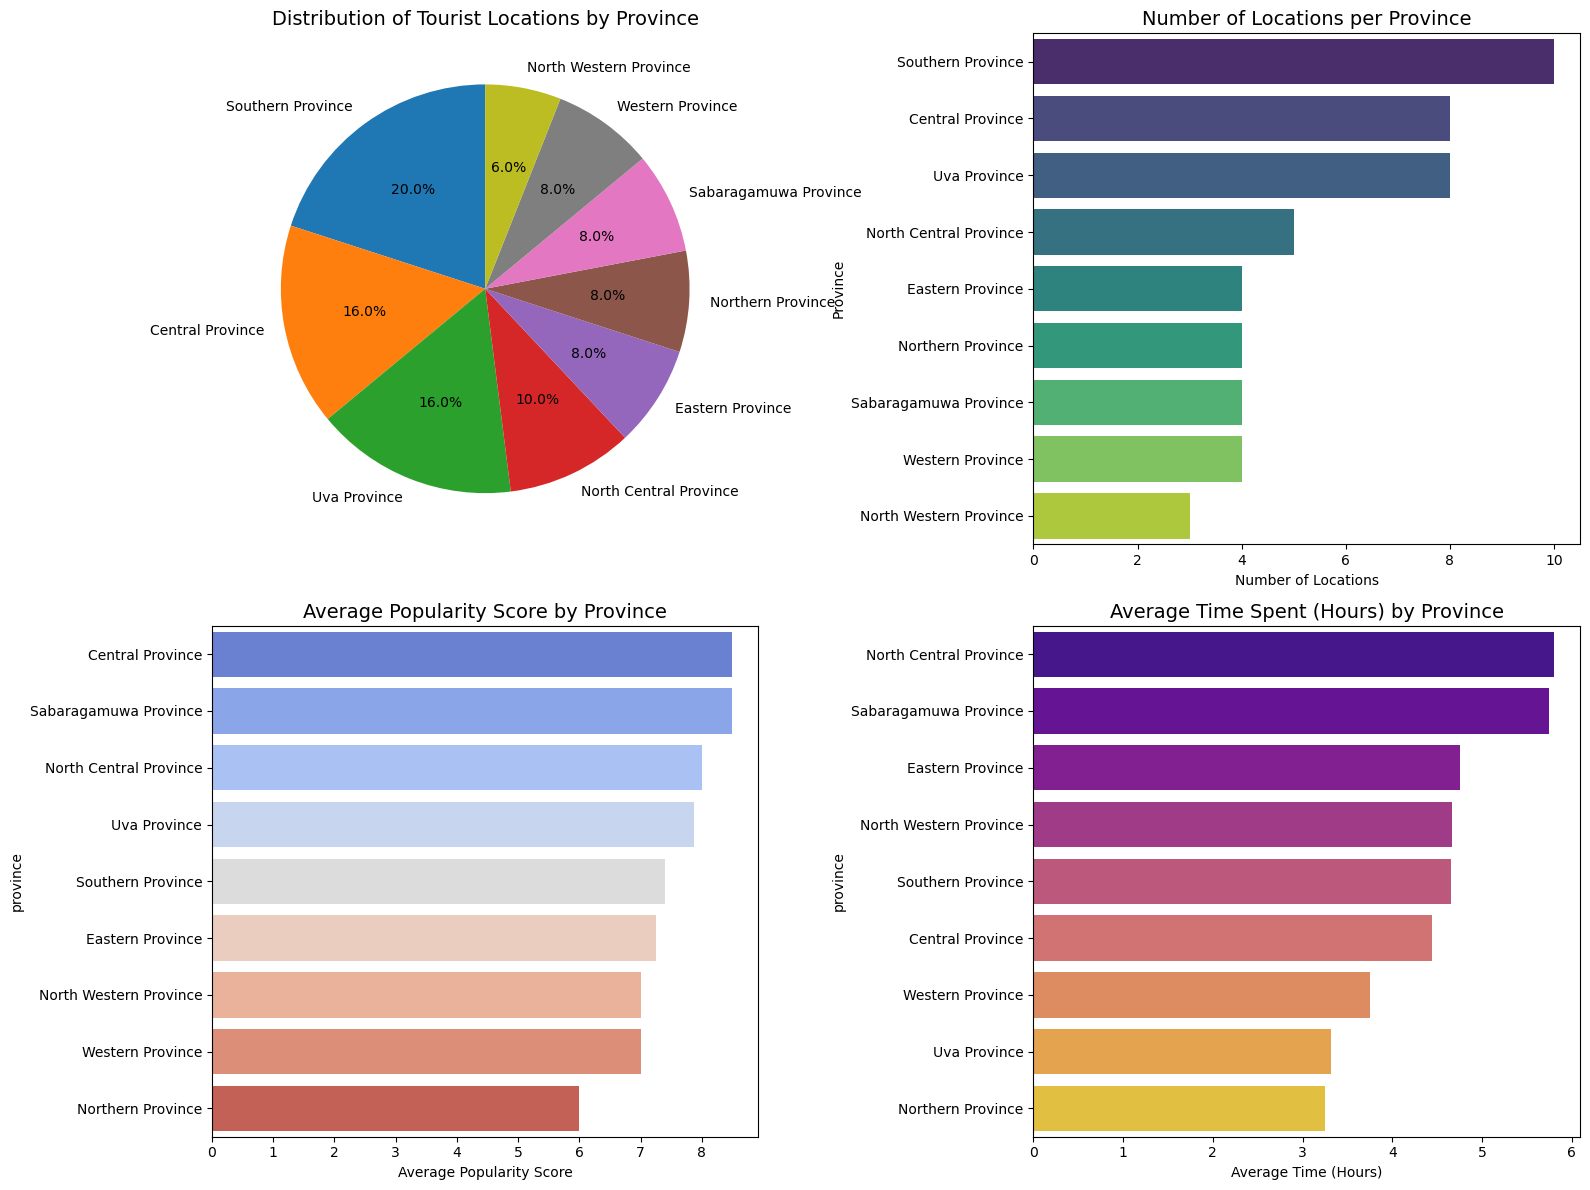

In [14]:
# Create a comprehensive province analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Province distribution (pie chart)
province_counts = df['province'].value_counts()
axes[0,0].pie(province_counts.values, labels=province_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Tourist Locations by Province', fontsize=14)

# 2. Province distribution (bar chart)
province_counts = (
    df['province']
      .value_counts()
      .reset_index()
      .rename(columns={'index': 'province', 'province': 'count'})
)

sns.barplot(
    data=province_counts,
    y='province',
    x='count',
    palette='viridis',
    ax=axes[0,1]
)
axes[0,1].set_title('Number of Locations per Province', fontsize=14)
axes[0,1].set_xlabel('Number of Locations')
axes[0,1].set_ylabel('Province')


# 3. Average popularity score by province
avg_popularity = df.groupby('province')['popularity_score'].mean().sort_values(ascending=False)
sns.barplot(x=avg_popularity.values, y=avg_popularity.index, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Average Popularity Score by Province', fontsize=14)
axes[1,0].set_xlabel('Average Popularity Score')

# 4. Average time spent by province
avg_time = df.groupby('province')['avg_time_hours'].mean().sort_values(ascending=False)
sns.barplot(x=avg_time.values, y=avg_time.index, ax=axes[1,1], palette='plasma')
axes[1,1].set_title('Average Time Spent (Hours) by Province', fontsize=14)
axes[1,1].set_xlabel('Average Time (Hours)')

plt.tight_layout()
plt.show()

### 3.2 Primary Category Analysis

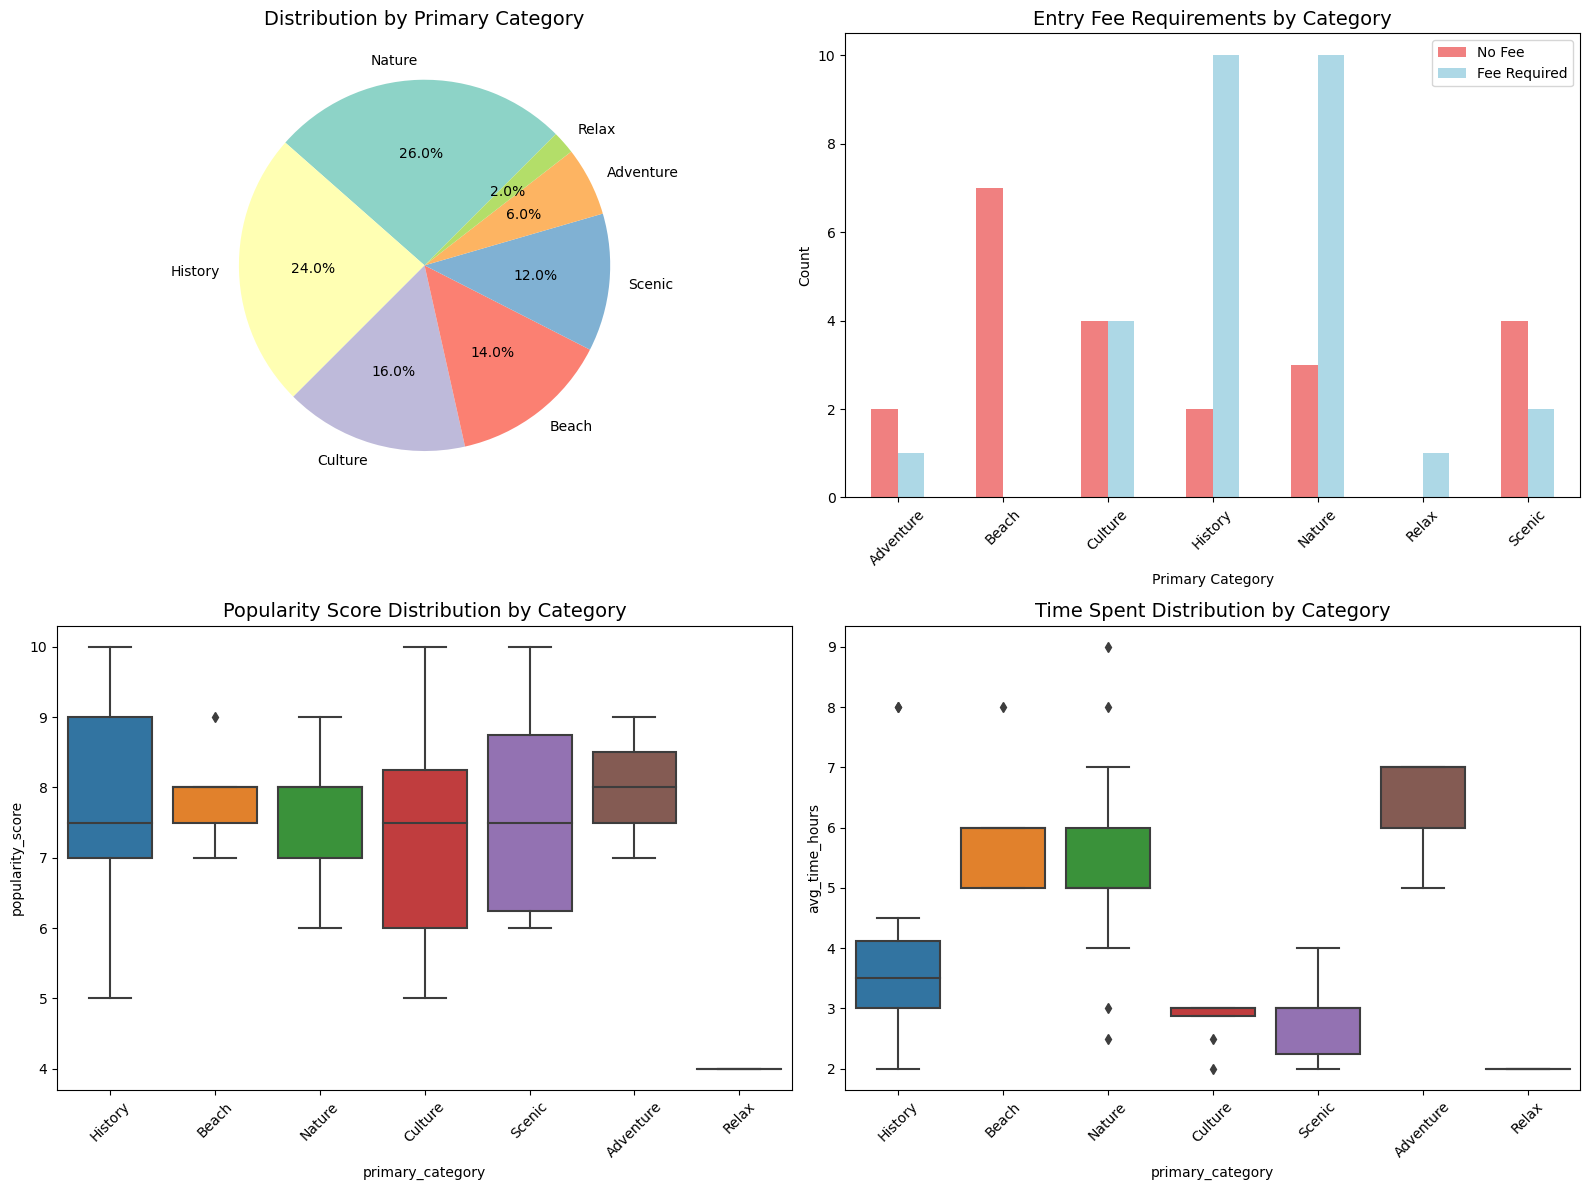

In [15]:
# Primary category analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Primary category distribution
category_counts = df['primary_category'].value_counts()
colors = plt.cm.Set3(range(len(category_counts)))
axes[0,0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=45)
axes[0,0].set_title('Distribution by Primary Category', fontsize=14)

# 2. Entry fee requirement by category
entry_fee_by_category = pd.crosstab(df['primary_category'], df['entry_fee_required'])
entry_fee_by_category.plot(kind='bar', ax=axes[0,1], color=['lightcoral', 'lightblue'])
axes[0,1].set_title('Entry Fee Requirements by Category', fontsize=14)
axes[0,1].set_xlabel('Primary Category')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['No Fee', 'Fee Required'])
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Popularity vs Category
sns.boxplot(data=df, x='primary_category', y='popularity_score', ax=axes[1,0])
axes[1,0].set_title('Popularity Score Distribution by Category', fontsize=14)
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Time spent vs Category
sns.boxplot(data=df, x='primary_category', y='avg_time_hours', ax=axes[1,1])
axes[1,1].set_title('Time Spent Distribution by Category', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 3.3 Difficulty and Seasonal Analysis

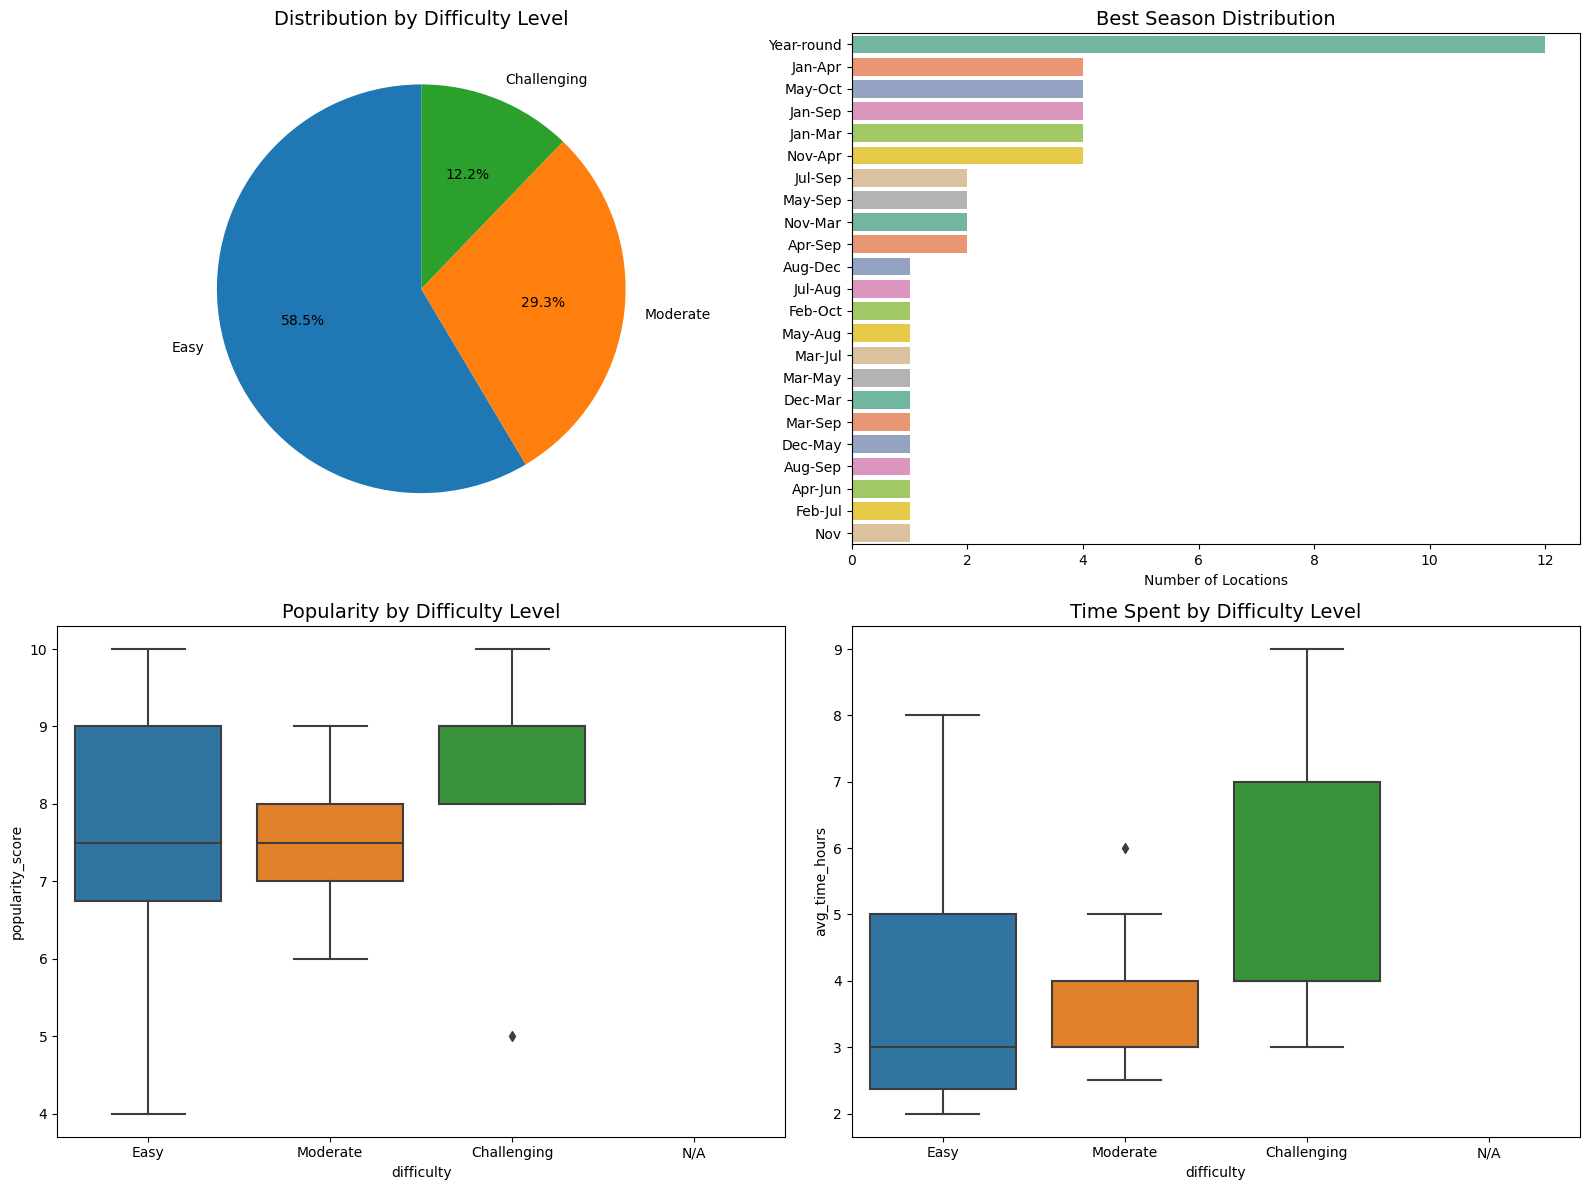

In [7]:
# Difficulty and seasonal analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Difficulty distribution
difficulty_counts = df['difficulty'].value_counts()
axes[0,0].pie(difficulty_counts.values, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution by Difficulty Level', fontsize=14)

# 2. Best season analysis
# Process best_season data - some have multiple seasons
season_list = []
for season in df['best_season'].dropna():
    if ',' in season:
        season_list.extend([s.strip() for s in season.split(',')])
    else:
        season_list.append(season.strip())

season_counts = pd.Series(season_list).value_counts()
sns.barplot(x=season_counts.values, y=season_counts.index, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Best Season Distribution', fontsize=14)
axes[0,1].set_xlabel('Number of Locations')

# 3. Difficulty vs Popularity
difficulty_order = ['Easy', 'Moderate', 'Challenging', 'N/A']
df_difficulty = df[df['difficulty'].isin(difficulty_order)]
sns.boxplot(data=df_difficulty, x='difficulty', y='popularity_score', ax=axes[1,0], 
            order=difficulty_order)
axes[1,0].set_title('Popularity by Difficulty Level', fontsize=14)

# 4. Time vs Difficulty
sns.boxplot(data=df_difficulty, x='difficulty', y='avg_time_hours', ax=axes[1,1], 
            order=difficulty_order)
axes[1,1].set_title('Time Spent by Difficulty Level', fontsize=14)

plt.tight_layout()
plt.show()

### 3.4 Geographic Distribution and Correlations

In [27]:
!pip install geopandas contextily

  Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
  Using cached shapely-2.1.2-cp310-cp310-win_amd64.whl (1.7 MB)
  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached pyogrio-0.11.1-cp310-cp310-win_amd64.whl (19.2 MB)
     --------------------------------------- 25.4/25.4 MB 25.2 MB/s eta 0:00:00
     ---------------------------------------- 125.4/125.4 kB ? eta 0:00:00
     ---------------------------------------- 40.7/40.7 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Perera\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



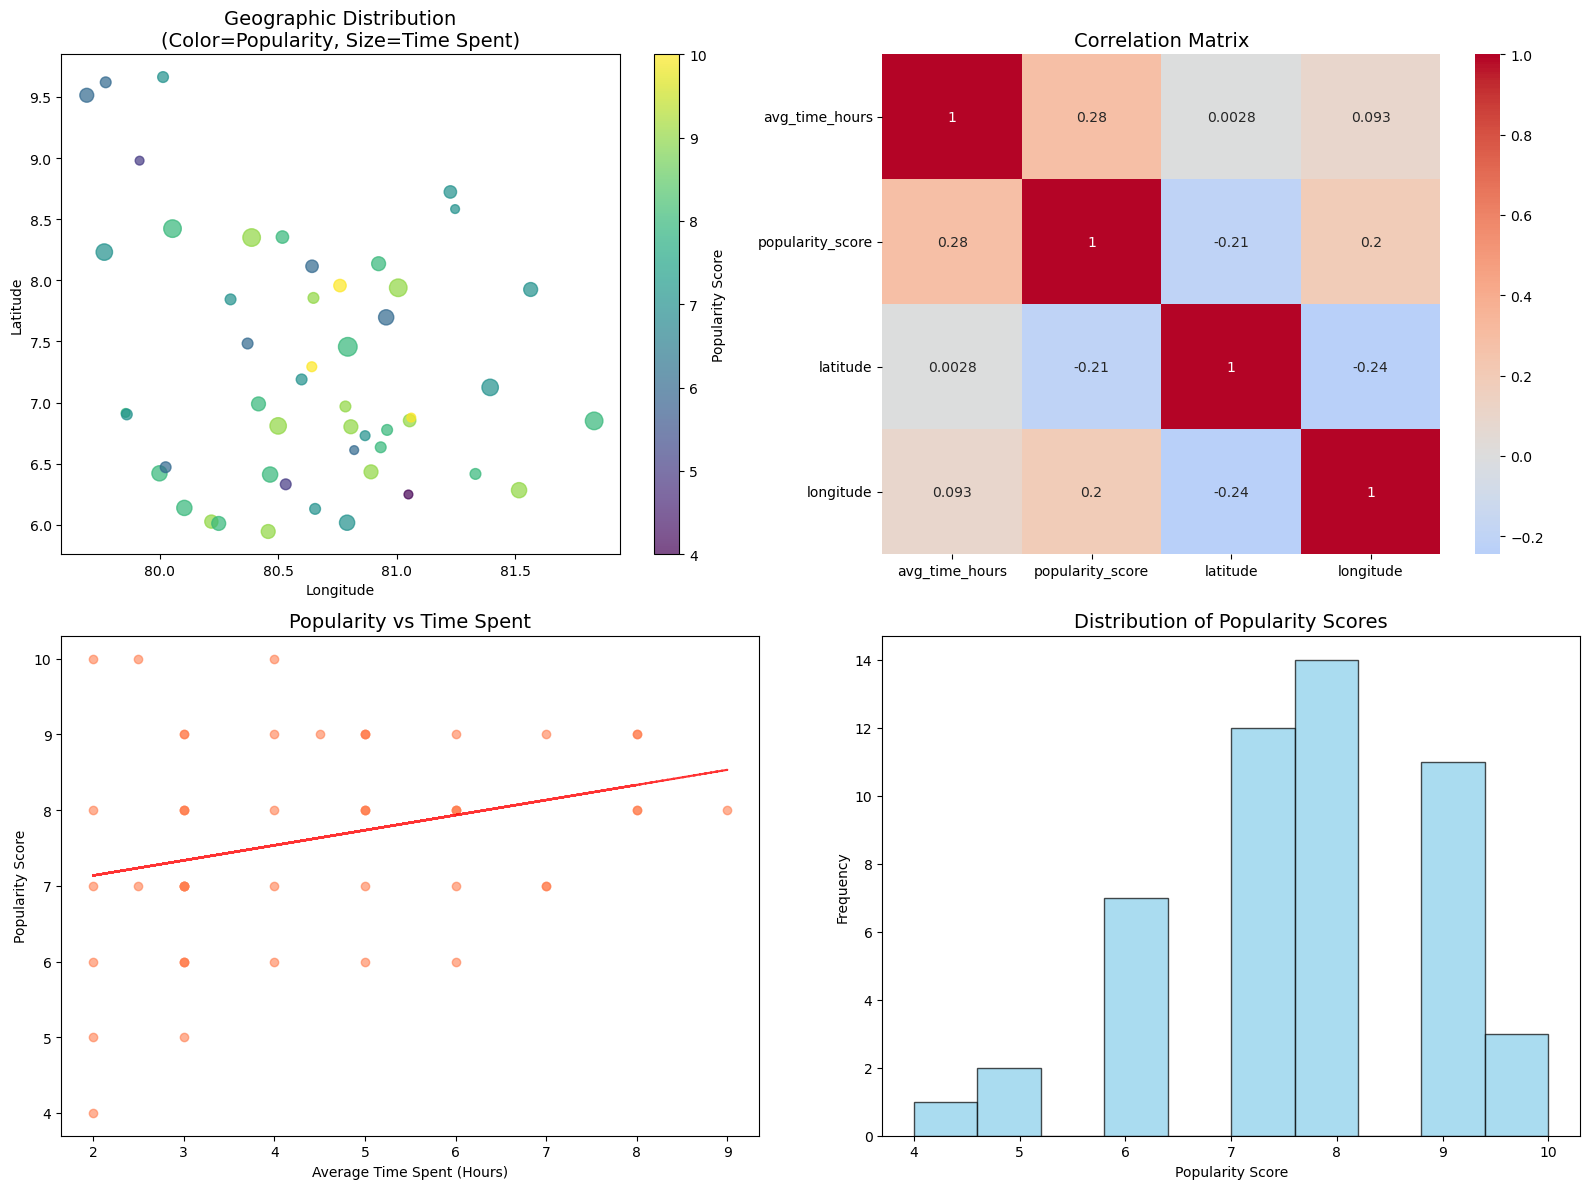

In [23]:
# Geographic and correlation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot: Latitude vs Longitude colored by popularity
scatter = axes[0,0].scatter(df['longitude'], df['latitude'], c=df['popularity_score'], 
                           s=df['avg_time_hours']*20, alpha=0.7, cmap='viridis')
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('Geographic Distribution\n(Color=Popularity, Size=Time Spent)', fontsize=14)
plt.colorbar(scatter, ax=axes[0,0], label='Popularity Score')

# 2. Correlation heatmap of numerical variables
numerical_cols = ['avg_time_hours', 'popularity_score', 'latitude', 'longitude']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Correlation Matrix', fontsize=14)

# 3. Popularity vs Time spent
axes[1,0].scatter(df['avg_time_hours'], df['popularity_score'], alpha=0.6, color='coral')
axes[1,0].set_xlabel('Average Time Spent (Hours)')
axes[1,0].set_ylabel('Popularity Score')
axes[1,0].set_title('Popularity vs Time Spent', fontsize=14)

# Add trend line
z = np.polyfit(df['avg_time_hours'], df['popularity_score'], 1)
p = np.poly1d(z)
axes[1,0].plot(df['avg_time_hours'], p(df['avg_time_hours']), "r--", alpha=0.8)

# 4. Distribution of popularity scores
axes[1,1].hist(df['popularity_score'], bins=10, color='skyblue', alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Popularity Score')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Distribution of Popularity Scores', fontsize=14)

plt.tight_layout()
plt.show()

### 3.5 Travel Times Analysis

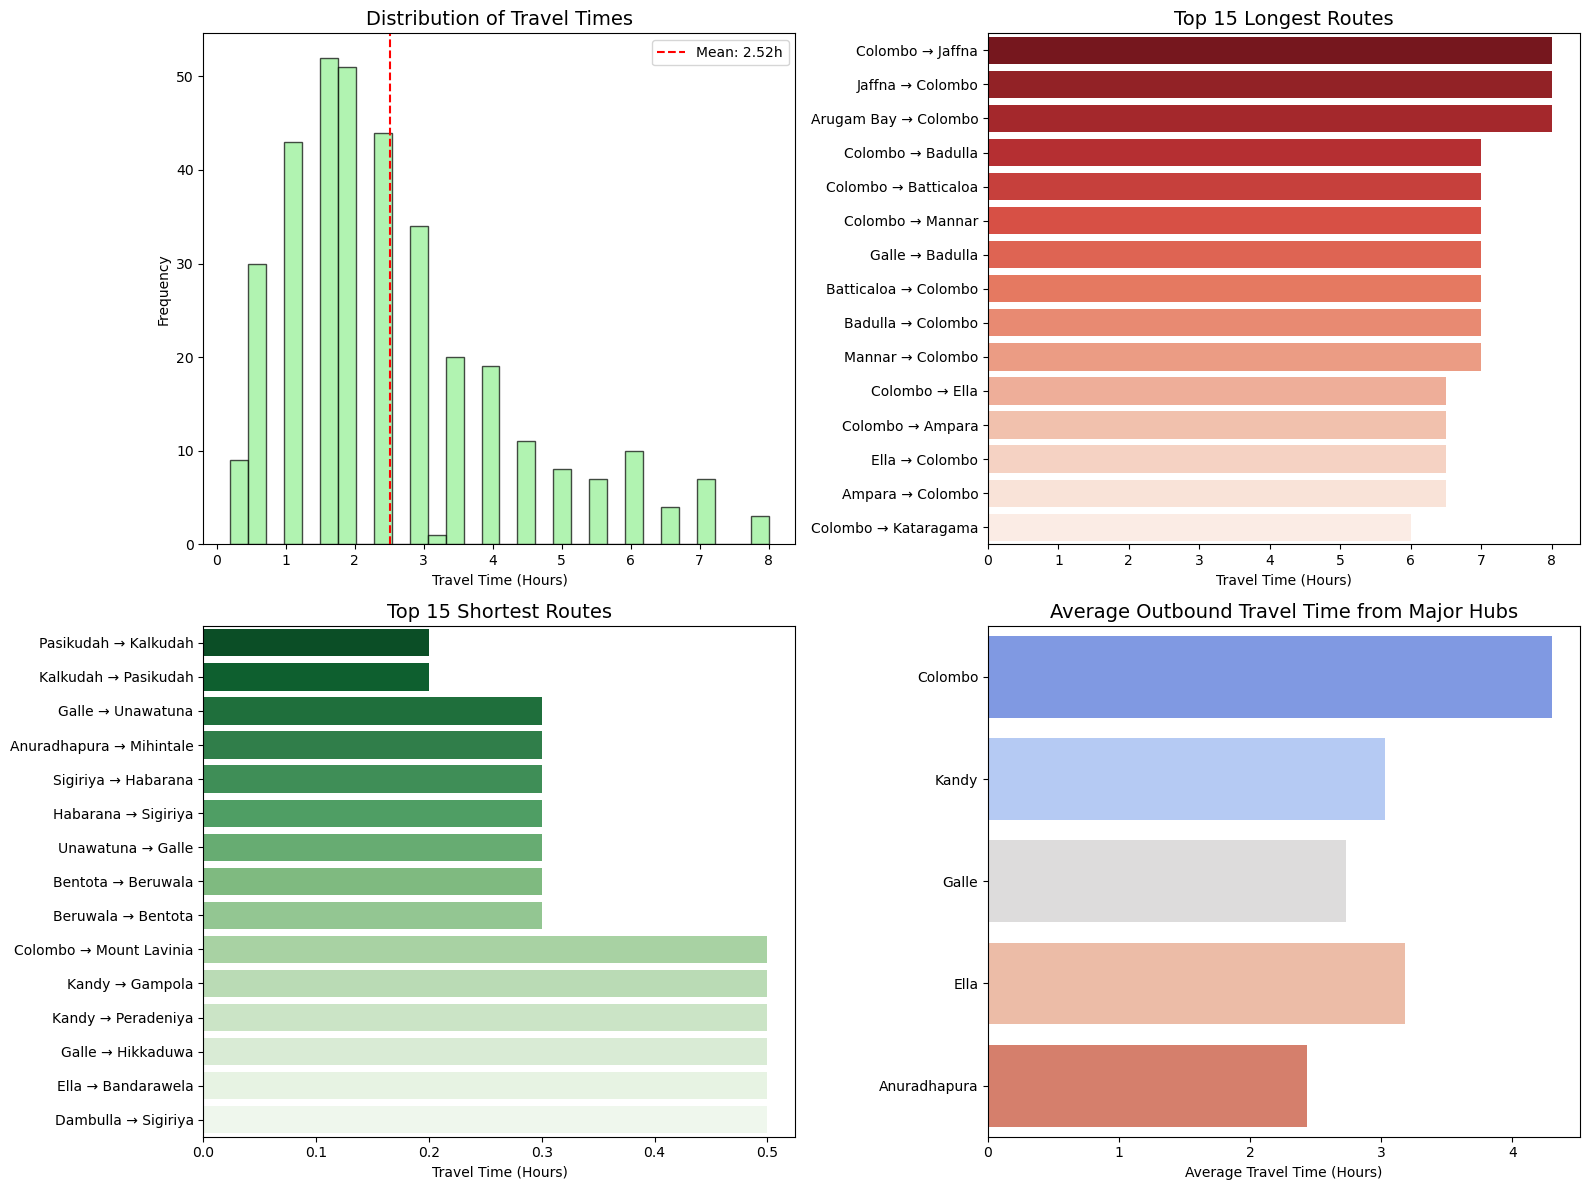

In [ ]:
# Travel times analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of travel times
axes[0,0].hist(travel_df['travel_time_hours'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Travel Time (Hours)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Travel Times', fontsize=14)
axes[0,0].axvline(travel_df['travel_time_hours'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {travel_df["travel_time_hours"].mean():.2f}h')
axes[0,0].legend()

# 2. Top 15 longest routes
longest_routes = travel_df.nlargest(15, 'travel_time_hours')
route_labels = [f"{row['origin_city']} → {row['destination_city']}" for _, row in longest_routes.iterrows()]
sns.barplot(x=longest_routes['travel_time_hours'], y=route_labels, ax=axes[0,1], palette='Reds_r')
axes[0,1].set_title('Top 15 Longest Routes', fontsize=14)
axes[0,1].set_xlabel('Travel Time (Hours)')

# 3. Top 15 shortest routes (excluding same city routes)
shortest_routes = travel_df[travel_df['travel_time_hours'] > 0].nsmallest(15, 'travel_time_hours')
short_route_labels = [f"{row['origin_city']} → {row['destination_city']}" for _, row in shortest_routes.iterrows()]
sns.barplot(x=shortest_routes['travel_time_hours'], y=short_route_labels, ax=axes[1,0], palette='Greens_r')
axes[1,0].set_title('Top 15 Shortest Routes', fontsize=14)
axes[1,0].set_xlabel('Travel Time (Hours)')

# 4. Average travel time from major tourist hubs
major_hubs = ['Colombo', 'Kandy', 'Galle', 'Ella', 'Anuradhapura']
hub_avg_times = []
for hub in major_hubs:
    avg_time = travel_df[travel_df['origin_city'] == hub]['travel_time_hours'].mean()
    hub_avg_times.append(avg_time)

sns.barplot(x=hub_avg_times, y=major_hubs, ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title('Average Outbound Travel Time from Major Hubs', fontsize=14)
axes[1,1].set_xlabel('Average Travel Time (Hours)')

plt.tight_layout()
plt.show()

### 3.6 Advanced Geographic Visualizations

In [20]:
# # --- Base map of Sri Lanka (GeoPandas) + points ---
# import geopandas as gpd
# from shapely.geometry import Point
# import matplotlib.pyplot as plt

# # 1. Load Natural Earth low-res world (comes with GeoPandas)
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# sri_lanka = world[world['iso_a3'] == 'LKA']

# # 2. Build GeoDataFrame of your locations
# gdf = gpd.GeoDataFrame(
#     df.copy(),
#     geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
#     crs="EPSG:4326"
# )

# # 3. Plot
# fig, ax = plt.subplots(figsize=(8,10))
# sri_lanka.plot(ax=ax, color="#f2efe9", edgecolor="#555", linewidth=0.6)

# # Color by popularity (example) – adjust as needed
# scatter = gdf.plot(
#     ax=ax,
#     column='popularity_score',
#     cmap='viridis',
#     markersize=gdf['avg_time_hours']*18,
#     alpha=0.8,
#     legend=True,
#     legend_kwds={'label': 'Popularity Score'}
# )

# # Optional labels (comment out if cluttered)
# for _, r in gdf.nlargest(15, 'popularity_score').iterrows():
#     ax.text(r.geometry.x + 0.1, r.geometry.y, r['name'], fontsize=8)

# ax.set_title("Tourist Locations over Sri Lanka Base Map", fontsize=14)
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")
# plt.tight_layout()
# plt.show()

ModuleNotFoundError: No module named 'geopandas'

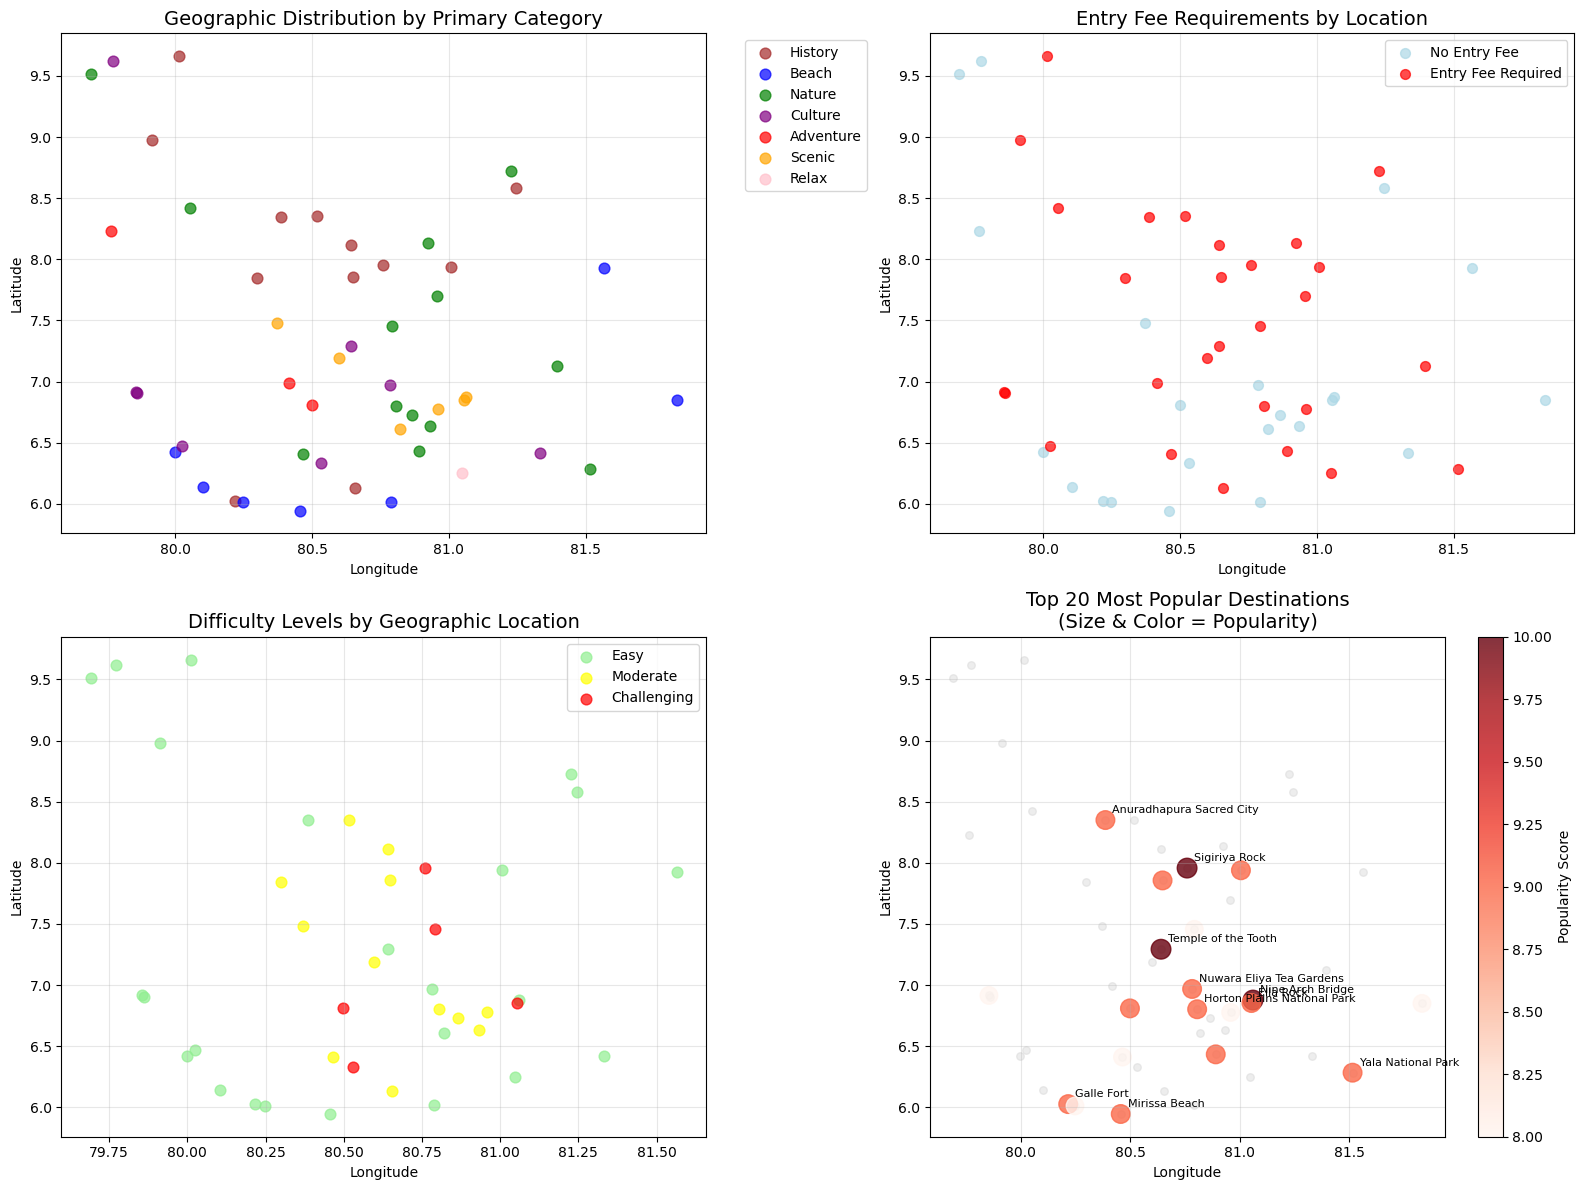

In [19]:
# Advanced geographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Category distribution by geographic location
category_colors = {'History': 'brown', 'Beach': 'blue', 'Nature': 'green', 
                  'Culture': 'purple', 'Adventure': 'red', 'Scenic': 'orange', 'Relax': 'pink'}

for category, color in category_colors.items():
    category_data = df[df['primary_category'] == category]
    if not category_data.empty:
        axes[0,0].scatter(category_data['longitude'], category_data['latitude'], 
                         c=color, label=category, s=60, alpha=0.7)

axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('Geographic Distribution by Primary Category', fontsize=14)
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(True, alpha=0.3)

# 2. Entry fee requirements geographic distribution
fee_required = df[df['entry_fee_required'] == True]
no_fee = df[df['entry_fee_required'] == False]

axes[0,1].scatter(no_fee['longitude'], no_fee['latitude'], c='lightblue', 
                 label='No Entry Fee', s=50, alpha=0.7)
axes[0,1].scatter(fee_required['longitude'], fee_required['latitude'], c='red', 
                 label='Entry Fee Required', s=50, alpha=0.7)
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
axes[0,1].set_title('Entry Fee Requirements by Location', fontsize=14)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Difficulty levels geographic distribution
difficulty_colors = {'Easy': 'lightgreen', 'Moderate': 'yellow', 'Challenging': 'red', 'N/A': 'gray'}

for difficulty, color in difficulty_colors.items():
    diff_data = df[df['difficulty'] == difficulty]
    if not diff_data.empty:
        axes[1,0].scatter(diff_data['longitude'], diff_data['latitude'], 
                         c=color, label=difficulty, s=60, alpha=0.7)

axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
axes[1,0].set_title('Difficulty Levels by Geographic Location', fontsize=14)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Top destinations map with larger markers
top_destinations = df.nlargest(20, 'popularity_score')
scatter = axes[1,1].scatter(df['longitude'], df['latitude'], c='lightgray', s=30, alpha=0.4)
scatter2 = axes[1,1].scatter(top_destinations['longitude'], top_destinations['latitude'], 
                            c=top_destinations['popularity_score'], s=top_destinations['popularity_score']*20, 
                            alpha=0.8, cmap='Reds')

# Add labels for top 10 destinations
top_10 = df.nlargest(10, 'popularity_score')
for idx, row in top_10.iterrows():
    axes[1,1].annotate(row['name'], (row['longitude'], row['latitude']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1].set_title('Top 20 Most Popular Destinations\n(Size & Color = Popularity)', fontsize=14)
plt.colorbar(scatter2, ax=axes[1,1], label='Popularity Score')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.7 Statistical Summary and Insights

In [28]:
# Statistical summary and key insights
import numpy as np

print("🌟 KEY INSIGHTS FROM SRI LANKA TOURISM DATA 🌟")
print("=" * 60)

# Basic statistics
print(f"📊 BASIC STATISTICS:")
print(f"   • Total Tourist Locations: {len(df)}")
print(f"   • Average Popularity Score: {df['popularity_score'].mean():.2f}")
print(f"   • Average Time Spent: {df['avg_time_hours'].mean():.2f} hours")
print(f"   • Percentage requiring entry fee: {(df['entry_fee_required'].sum() / len(df) * 100):.1f}%")

# Top insights
print(f"\n🏆 TOP PERFORMERS:")
most_popular = df.loc[df['popularity_score'].idxmax()]
print(f"   • Most Popular: {most_popular['name']} (Score: {most_popular['popularity_score']})")

longest_time = df.loc[df['avg_time_hours'].idxmax()]
print(f"   • Longest Visit: {longest_time['name']} ({longest_time['avg_time_hours']} hours)")

# Province insights
print(f"\n🗺️ PROVINCE INSIGHTS:")
province_stats = df.groupby('province').agg({
    'popularity_score': 'mean',
    'avg_time_hours': 'mean',
    'name': 'count'
}).round(2)

top_province = province_stats.loc[province_stats['popularity_score'].idxmax()]
print(f"   • Highest avg popularity: {province_stats['popularity_score'].idxmax()} ({top_province['popularity_score']})")
print(f"   • Most locations: {province_stats['name'].idxmax()} ({province_stats['name'].max()} locations)")

# Category insights
print(f"\n🎯 CATEGORY INSIGHTS:")
category_stats = df.groupby('primary_category').agg({
    'popularity_score': 'mean',
    'avg_time_hours': 'mean',
    'name': 'count'
}).round(2)

print(f"   • Most popular category: {category_stats['popularity_score'].idxmax()}")
print(f"   • Longest visit category: {category_stats['avg_time_hours'].idxmax()}")
print(f"   • Most common category: {category_stats['name'].idxmax()}")

# Travel insights
print(f"\n🚗 TRAVEL INSIGHTS:")
print(f"   • Total routes in dataset: {len(travel_df)}")
print(f"   • Average travel time: {travel_df['travel_time_hours'].mean():.2f} hours")
print(f"   • Longest route: {travel_df['travel_time_hours'].max():.1f} hours")
print(f"   • Shortest route: {travel_df['travel_time_hours'].min():.1f} hours")

# Difficulty insights
print(f"\n⭐ DIFFICULTY INSIGHTS:")
difficulty_dist = df['difficulty'].value_counts()
for difficulty, count in difficulty_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   • {difficulty}: {count} locations ({percentage:.1f}%)")

# Best season insights
print(f"\n🌦️ SEASONAL INSIGHTS:")
year_round = df[df['best_season'].str.contains('Year-round', na=False)]
print(f"   • Year-round destinations: {len(year_round)} ({len(year_round)/len(df)*100:.1f}%)")

# Geographic spread
print(f"\n🌍 GEOGRAPHIC SPREAD:")
print(f"   • Latitude range: {df['latitude'].min():.3f}° to {df['latitude'].max():.3f}°")
print(f"   • Longitude range: {df['longitude'].min():.3f}° to {df['longitude'].max():.3f}°")
print(f"   • Geographic center: ({df['latitude'].mean():.3f}°, {df['longitude'].mean():.3f}°)")

print("\n" + "=" * 60)

🌟 KEY INSIGHTS FROM SRI LANKA TOURISM DATA 🌟
📊 BASIC STATISTICS:
   • Total Tourist Locations: 50
   • Average Popularity Score: 7.62
   • Average Time Spent: 4.43 hours
   • Percentage requiring entry fee: 56.0%

🏆 TOP PERFORMERS:
   • Most Popular: Temple of the Tooth (Score: 10)
   • Longest Visit: Knuckles Mountain Range (9.0 hours)

🗺️ PROVINCE INSIGHTS:
   • Highest avg popularity: Central Province (8.5)
   • Most locations: Southern Province (10 locations)

🎯 CATEGORY INSIGHTS:
   • Most popular category: Adventure
   • Longest visit category: Adventure
   • Most common category: Nature

🚗 TRAVEL INSIGHTS:
   • Total routes in dataset: 353
   • Average travel time: 2.52 hours
   • Longest route: 8.0 hours
   • Shortest route: 0.2 hours

⭐ DIFFICULTY INSIGHTS:
   • Easy: 24 locations (48.0%)
   • Moderate: 12 locations (24.0%)
   • Challenging: 5 locations (10.0%)

🌦️ SEASONAL INSIGHTS:
   • Year-round destinations: 12 (24.0%)

🌍 GEOGRAPHIC SPREAD:
   • Latitude range: 5.945° to 

### 3.8 Network Analysis of Travel Connections

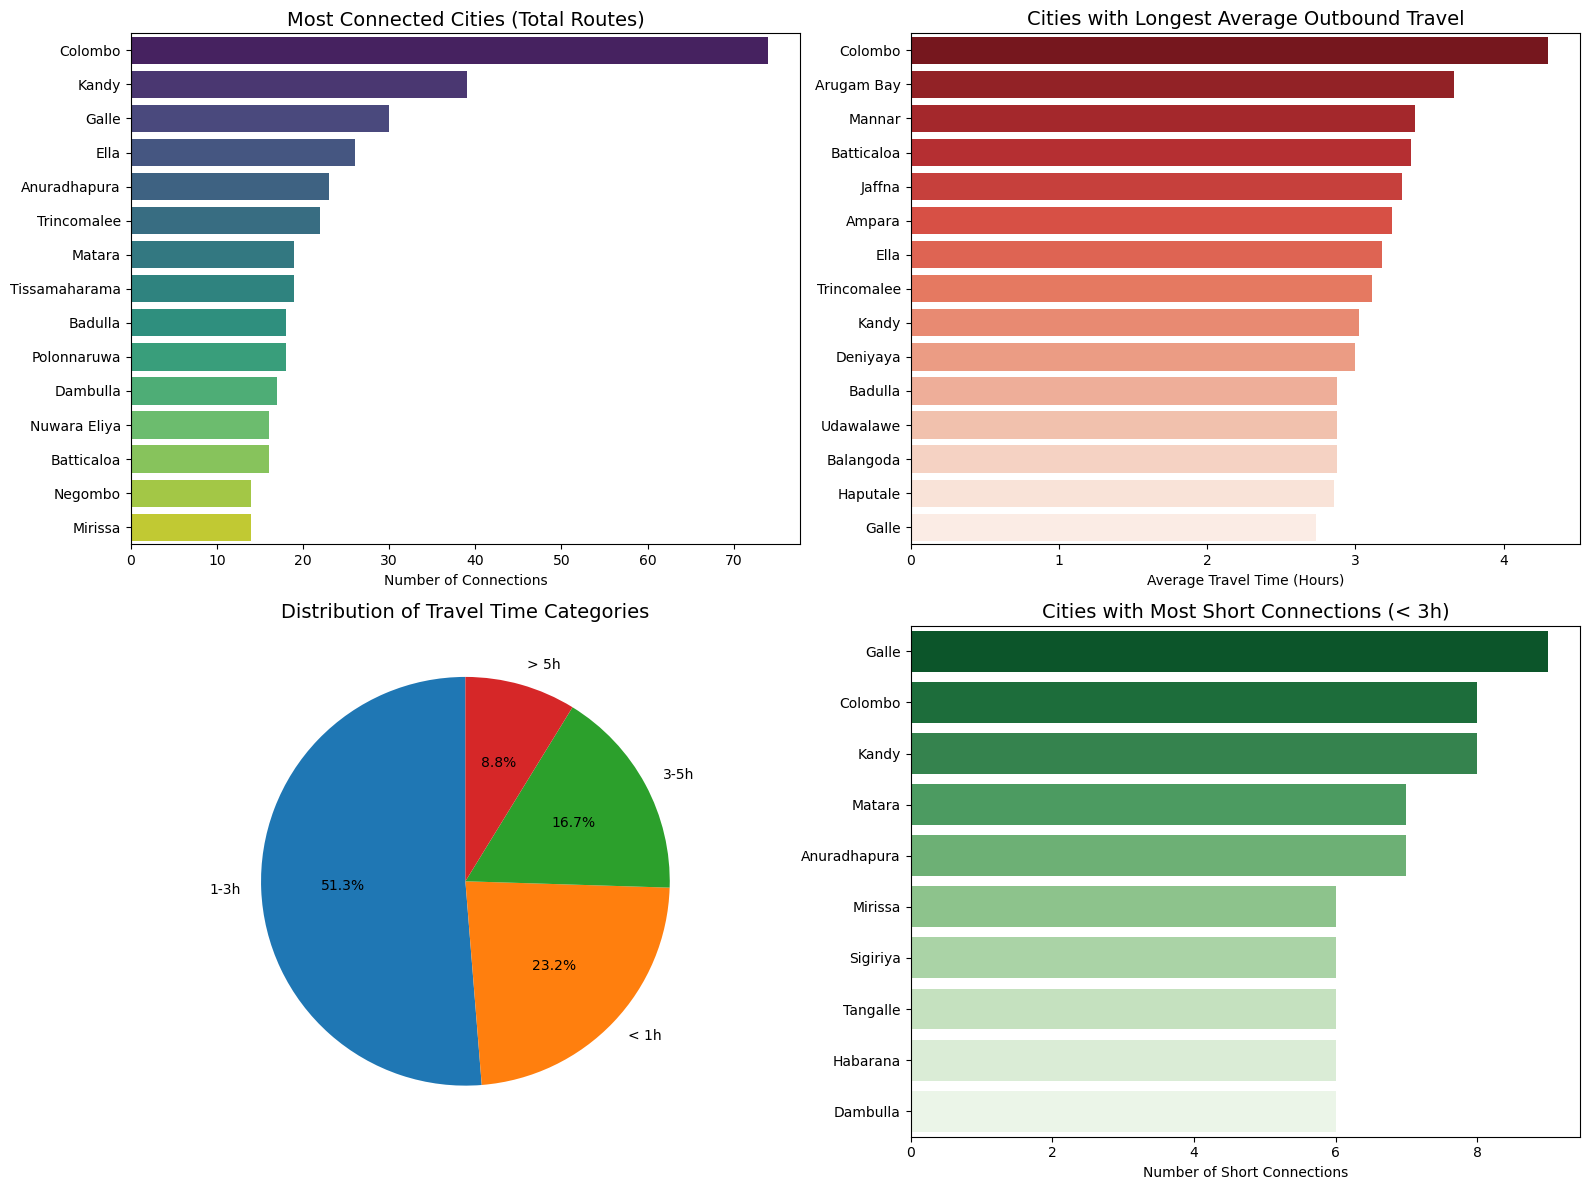

🌐 NETWORK ANALYSIS INSIGHTS
Most connected city: Colombo (74 connections)
City with longest avg outbound travel: Colombo (4.30h)
Total unique cities in network: 65
Average network connectivity: 10.9 connections per city


In [ ]:
# Network analysis of travel connections
from collections import defaultdict

# Create connectivity analysis
connectivity = defaultdict(list)
city_connections = defaultdict(int)

# Count connections for each city
for _, row in travel_df.iterrows():
    origin = row['origin_city']
    destination = row['destination_city']
    city_connections[origin] += 1
    city_connections[destination] += 1
    connectivity[origin].append((destination, row['travel_time_hours']))

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Most connected cities
top_connected = dict(sorted(city_connections.items(), key=lambda x: x[1], reverse=True)[:15])
sns.barplot(x=list(top_connected.values()), y=list(top_connected.keys()), ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Most Connected Cities (Total Routes)', fontsize=14)
axes[0,0].set_xlabel('Number of Connections')

# 2. Average outbound travel time by city
city_avg_outbound = {}
for city in travel_df['origin_city'].unique():
    city_routes = travel_df[travel_df['origin_city'] == city]
    if len(city_routes) > 0:
        city_avg_outbound[city] = city_routes['travel_time_hours'].mean()

top_avg_outbound = dict(sorted(city_avg_outbound.items(), key=lambda x: x[1], reverse=True)[:15])
sns.barplot(x=list(top_avg_outbound.values()), y=list(top_avg_outbound.keys()), 
           ax=axes[0,1], palette='Reds_r')
axes[0,1].set_title('Cities with Longest Average Outbound Travel', fontsize=14)
axes[0,1].set_xlabel('Average Travel Time (Hours)')

# 3. Travel time distribution by distance bins
travel_df['time_category'] = pd.cut(travel_df['travel_time_hours'], 
                                   bins=[0, 1, 3, 5, 10], 
                                   labels=['< 1h', '1-3h', '3-5h', '> 5h'])
time_dist = travel_df['time_category'].value_counts()
axes[1,0].pie(time_dist.values, labels=time_dist.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Distribution of Travel Time Categories', fontsize=14)

# 4. Hub analysis - cities with most short connections (< 3 hours)
short_connections = travel_df[travel_df['travel_time_hours'] < 3]
short_hub_count = short_connections['origin_city'].value_counts().head(10)
sns.barplot(x=short_hub_count.values, y=short_hub_count.index, ax=axes[1,1], palette='Greens_r')
axes[1,1].set_title('Cities with Most Short Connections (< 3h)', fontsize=14)
axes[1,1].set_xlabel('Number of Short Connections')

plt.tight_layout()
plt.show()

# Print network insights
print("🌐 NETWORK ANALYSIS INSIGHTS")
print("=" * 40)
print(f"Most connected city: {max(city_connections, key=city_connections.get)} ({max(city_connections.values())} connections)")
print(f"City with longest avg outbound travel: {max(city_avg_outbound, key=city_avg_outbound.get)} ({max(city_avg_outbound.values()):.2f}h)")
print(f"Total unique cities in network: {len(set(travel_df['origin_city'].unique().tolist() + travel_df['destination_city'].unique().tolist()))}")
print(f"Average network connectivity: {sum(city_connections.values()) / len(city_connections):.1f} connections per city")

## 4. Reviews Dataset Analysis

Now let's analyze the reviews dataset to understand user ratings, location performance, and review patterns. This will provide insights into visitor satisfaction and location quality.

In [ ]:
# Load the reviews dataset
reviews_df = pd.read_csv('../data/reviews.csv')

# Basic information about the reviews dataset
print("=== REVIEWS DATA ===")
print(f"Total reviews: {len(reviews_df)}")
print(f"Unique locations reviewed: {reviews_df['location_id'].nunique()}")
print(f"Unique users: {reviews_df['user_id'].nunique()}")
print(f"Average rating: {reviews_df['rating'].mean():.2f}")
print(f"Rating distribution:")
print(reviews_df['rating'].value_counts().sort_index())

# Display first few rows
print(f"\nFirst 5 reviews:")
print(reviews_df.head())

=== REVIEWS DATA ===
Total reviews: 300
Unique locations reviewed: 97
Unique users: 300
Average rating: 4.10
Rating distribution:
2      1
3     64
4    138
5     97
Name: rating, dtype: int64

First 5 reviews:
   review_id  location_id  user_id  rating
0          1            5      101       5
1          2            5      102       4
2          3            7      103       3
3          4            5      104       5
4          5           18      105       5


### 4.1 Rating Distribution Analysis

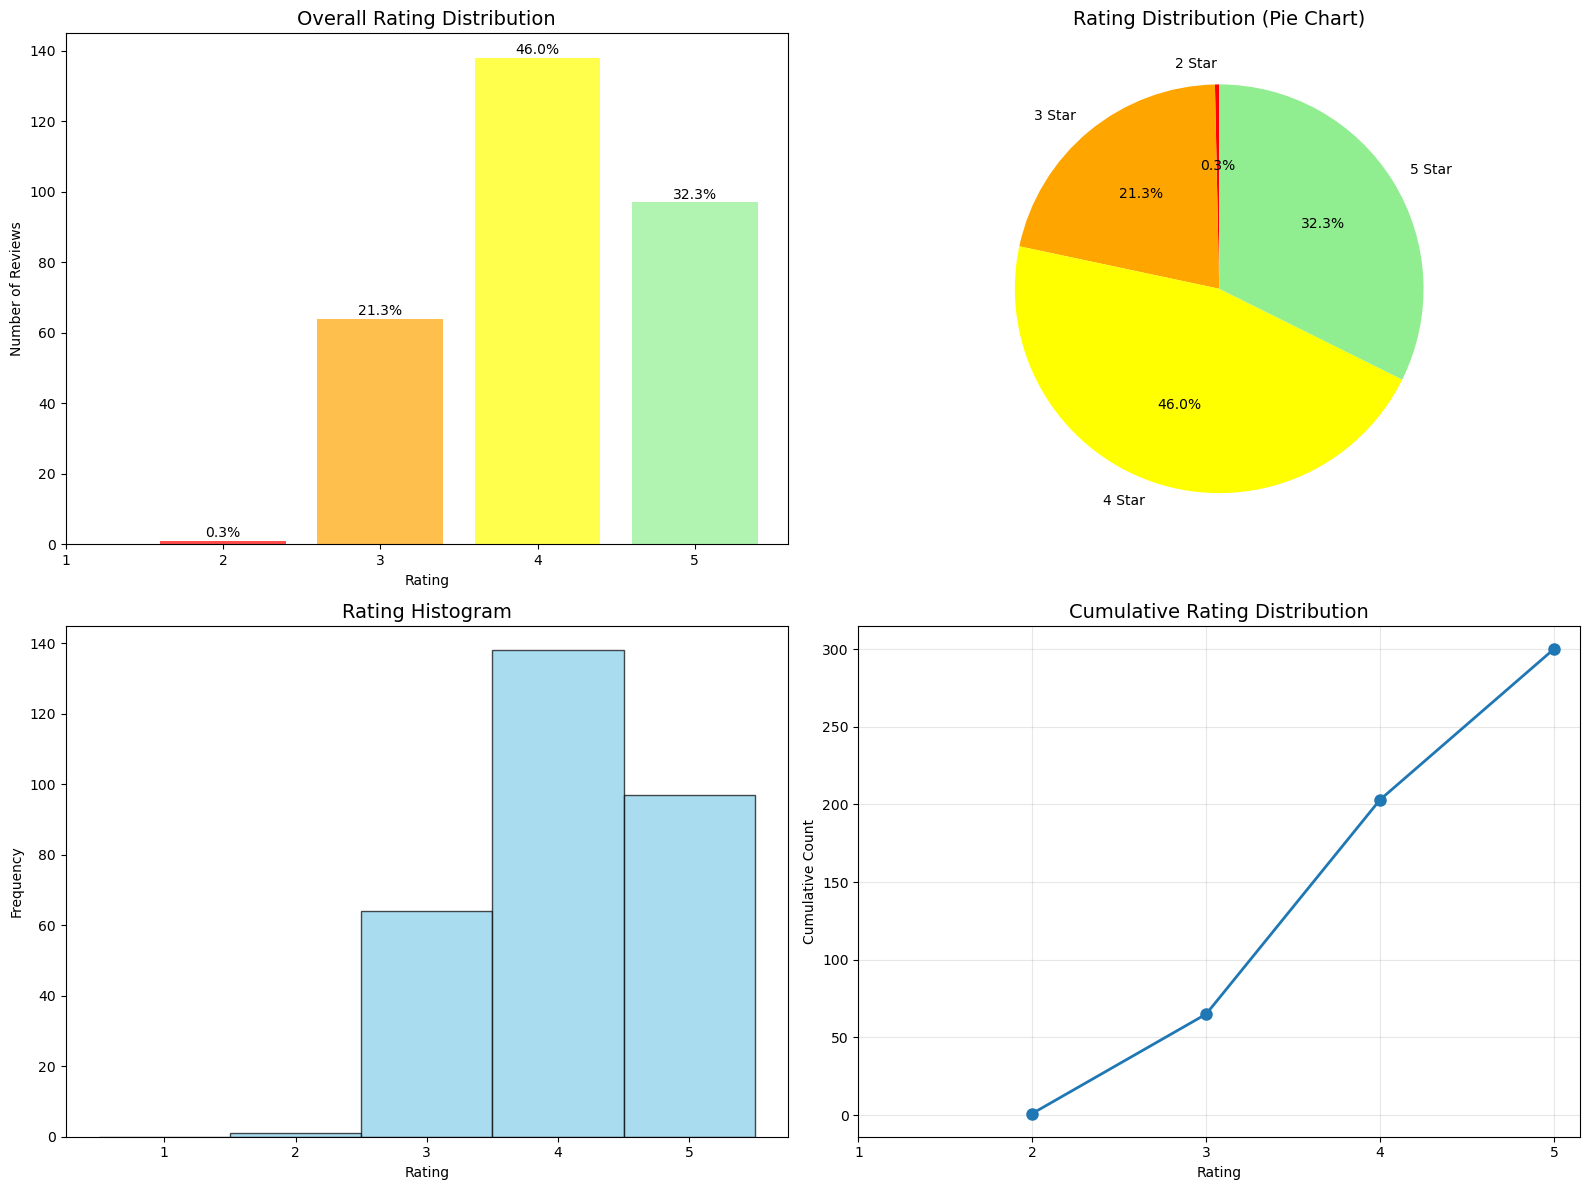

📊 RATING STATISTICS:
   • Mean Rating: 4.10
   • Median Rating: 4.0
   • Mode Rating: 4
   • Standard Deviation: 0.74
   • Percentage of 4-5 star reviews: 78.3%


In [ ]:
# Rating distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall rating distribution
rating_counts = reviews_df['rating'].value_counts().sort_index()
axes[0,0].bar(rating_counts.index, rating_counts.values, color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.7)
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Number of Reviews')
axes[0,0].set_title('Overall Rating Distribution', fontsize=14)
axes[0,0].set_xticks([1, 2, 3, 4, 5])

# Add percentage labels on bars
for i, v in enumerate(rating_counts.values):
    percentage = (v / len(reviews_df)) * 100
    axes[0,0].text(rating_counts.index[i], v + 1, f'{percentage:.1f}%', ha='center')

# 2. Rating distribution pie chart
axes[0,1].pie(rating_counts.values, labels=[f'{i} Star' for i in rating_counts.index], 
              autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'lightgreen', 'green'], startangle=90)
axes[0,1].set_title('Rating Distribution (Pie Chart)', fontsize=14)

# 3. Histogram of ratings
axes[1,0].hist(reviews_df['rating'], bins=5, range=(0.5, 5.5), color='skyblue', alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Rating Histogram', fontsize=14)
axes[1,0].set_xticks([1, 2, 3, 4, 5])

# 4. Cumulative rating distribution
cumulative_ratings = rating_counts.cumsum()
axes[1,1].plot(rating_counts.index, cumulative_ratings.values, marker='o', linewidth=2, markersize=8)
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Cumulative Count')
axes[1,1].set_title('Cumulative Rating Distribution', fontsize=14)
axes[1,1].set_xticks([1, 2, 3, 4, 5])
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print rating statistics
print("📊 RATING STATISTICS:")
print(f"   • Mean Rating: {reviews_df['rating'].mean():.2f}")
print(f"   • Median Rating: {reviews_df['rating'].median():.1f}")
print(f"   • Mode Rating: {reviews_df['rating'].mode().iloc[0]}")
print(f"   • Standard Deviation: {reviews_df['rating'].std():.2f}")
print(f"   • Percentage of 4-5 star reviews: {((reviews_df['rating'] >= 4).sum() / len(reviews_df) * 100):.1f}%")

### 4.2 Location Performance Analysis

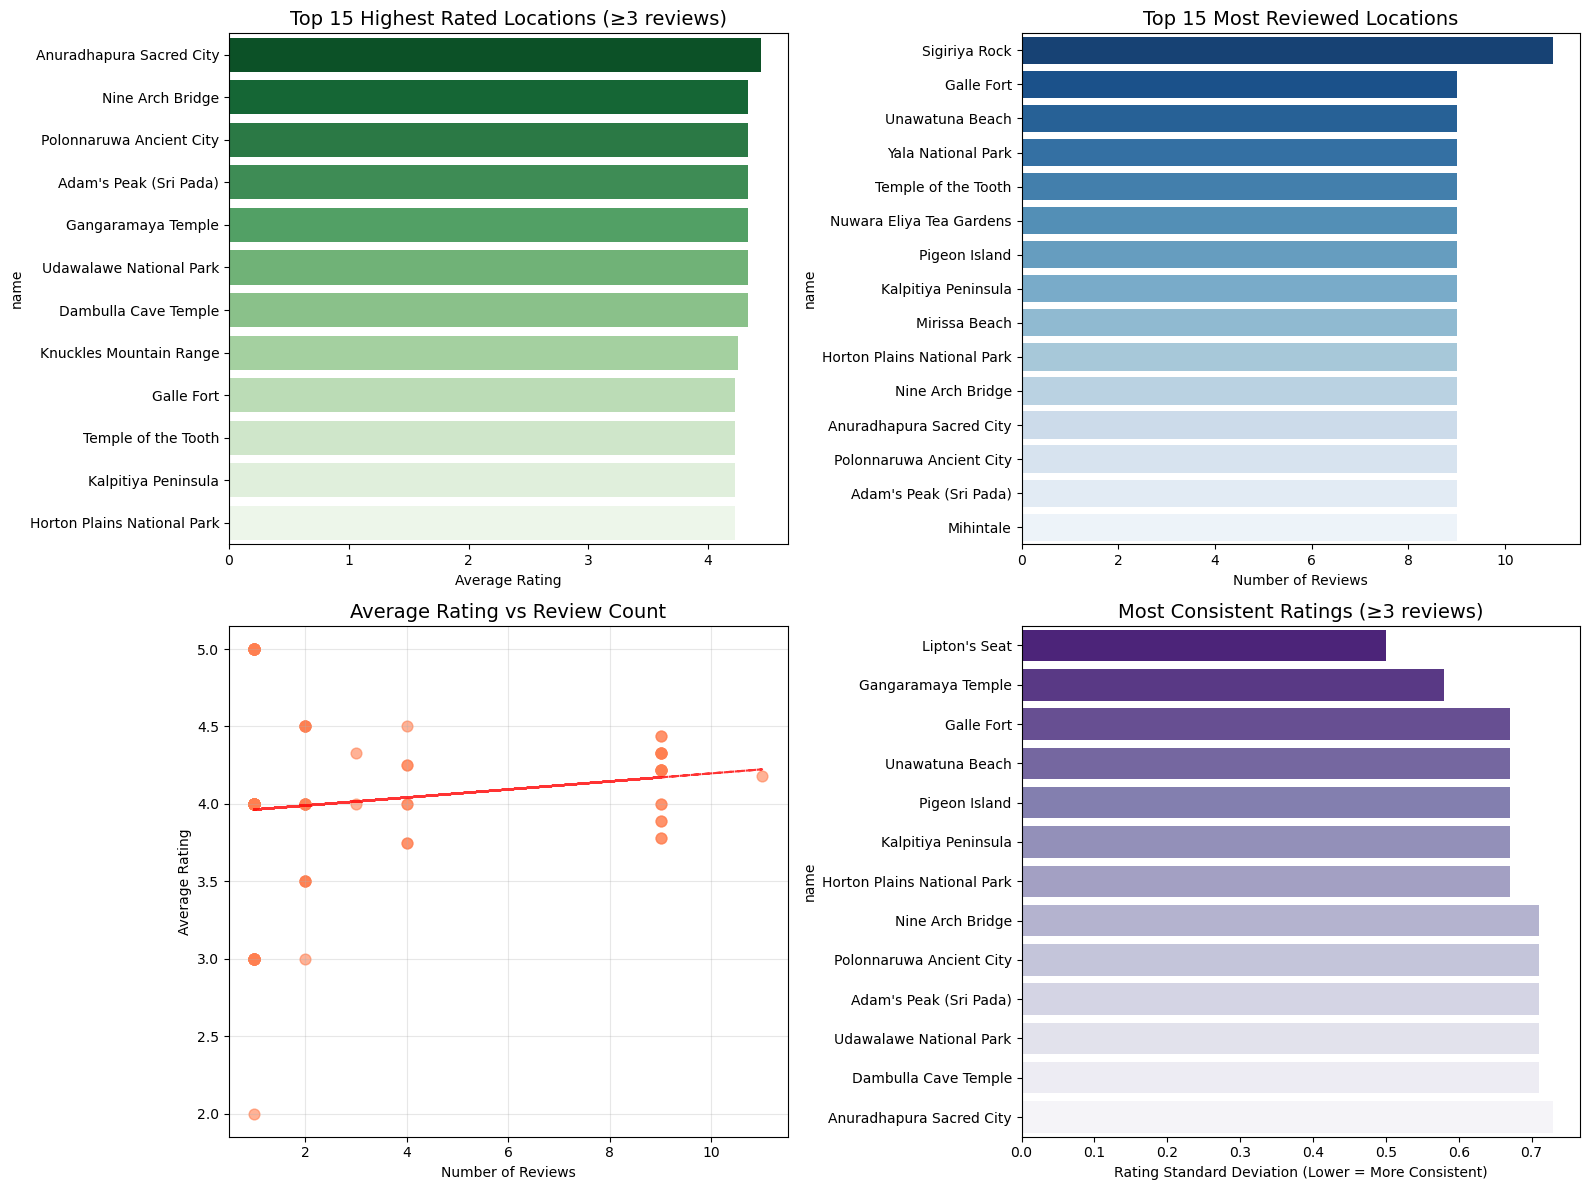

In [ ]:
# Merge reviews with location data for detailed analysis
location_reviews = reviews_df.merge(df, left_on='location_id', right_on='location_id', how='inner')

# Calculate location statistics
location_stats = reviews_df.groupby('location_id').agg({
    'rating': ['mean', 'count', 'std']
}).round(2)
location_stats.columns = ['avg_rating', 'review_count', 'rating_std']
location_stats = location_stats.reset_index()

# Merge with location names
location_stats = location_stats.merge(df[['location_id', 'name', 'primary_category', 'province']], 
                                     on='location_id', how='left')

# Location performance analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 highest rated locations (minimum 3 reviews)
top_rated = location_stats[location_stats['review_count'] >= 3].nlargest(15, 'avg_rating')
sns.barplot(data=top_rated, x='avg_rating', y='name', ax=axes[0,0], palette='Greens_r')
axes[0,0].set_title('Top 15 Highest Rated Locations (≥3 reviews)', fontsize=14)
axes[0,0].set_xlabel('Average Rating')

# 2. Top 15 most reviewed locations
most_reviewed = location_stats.nlargest(15, 'review_count')
sns.barplot(data=most_reviewed, x='review_count', y='name', ax=axes[0,1], palette='Blues_r')
axes[0,1].set_title('Top 15 Most Reviewed Locations', fontsize=14)
axes[0,1].set_xlabel('Number of Reviews')

# 3. Average rating vs Number of reviews scatter plot
axes[1,0].scatter(location_stats['review_count'], location_stats['avg_rating'], 
                 s=60, alpha=0.6, color='coral')
axes[1,0].set_xlabel('Number of Reviews')
axes[1,0].set_ylabel('Average Rating')
axes[1,0].set_title('Average Rating vs Review Count', fontsize=14)
axes[1,0].grid(True, alpha=0.3)

# Add trend line
if len(location_stats) > 1:
    z = np.polyfit(location_stats['review_count'], location_stats['avg_rating'], 1)
    p = np.poly1d(z)
    axes[1,0].plot(location_stats['review_count'], p(location_stats['review_count']), "r--", alpha=0.8)

# 4. Rating consistency (standard deviation)
consistent_ratings = location_stats[location_stats['review_count'] >= 3].nsmallest(15, 'rating_std')
sns.barplot(data=consistent_ratings, x='rating_std', y='name', ax=axes[1,1], palette='Purples_r')
axes[1,1].set_title('Most Consistent Ratings (≥3 reviews)', fontsize=14)
axes[1,1].set_xlabel('Rating Standard Deviation (Lower = More Consistent)')

plt.tight_layout()
plt.show()

### 4.3 Category and Province Review Analysis

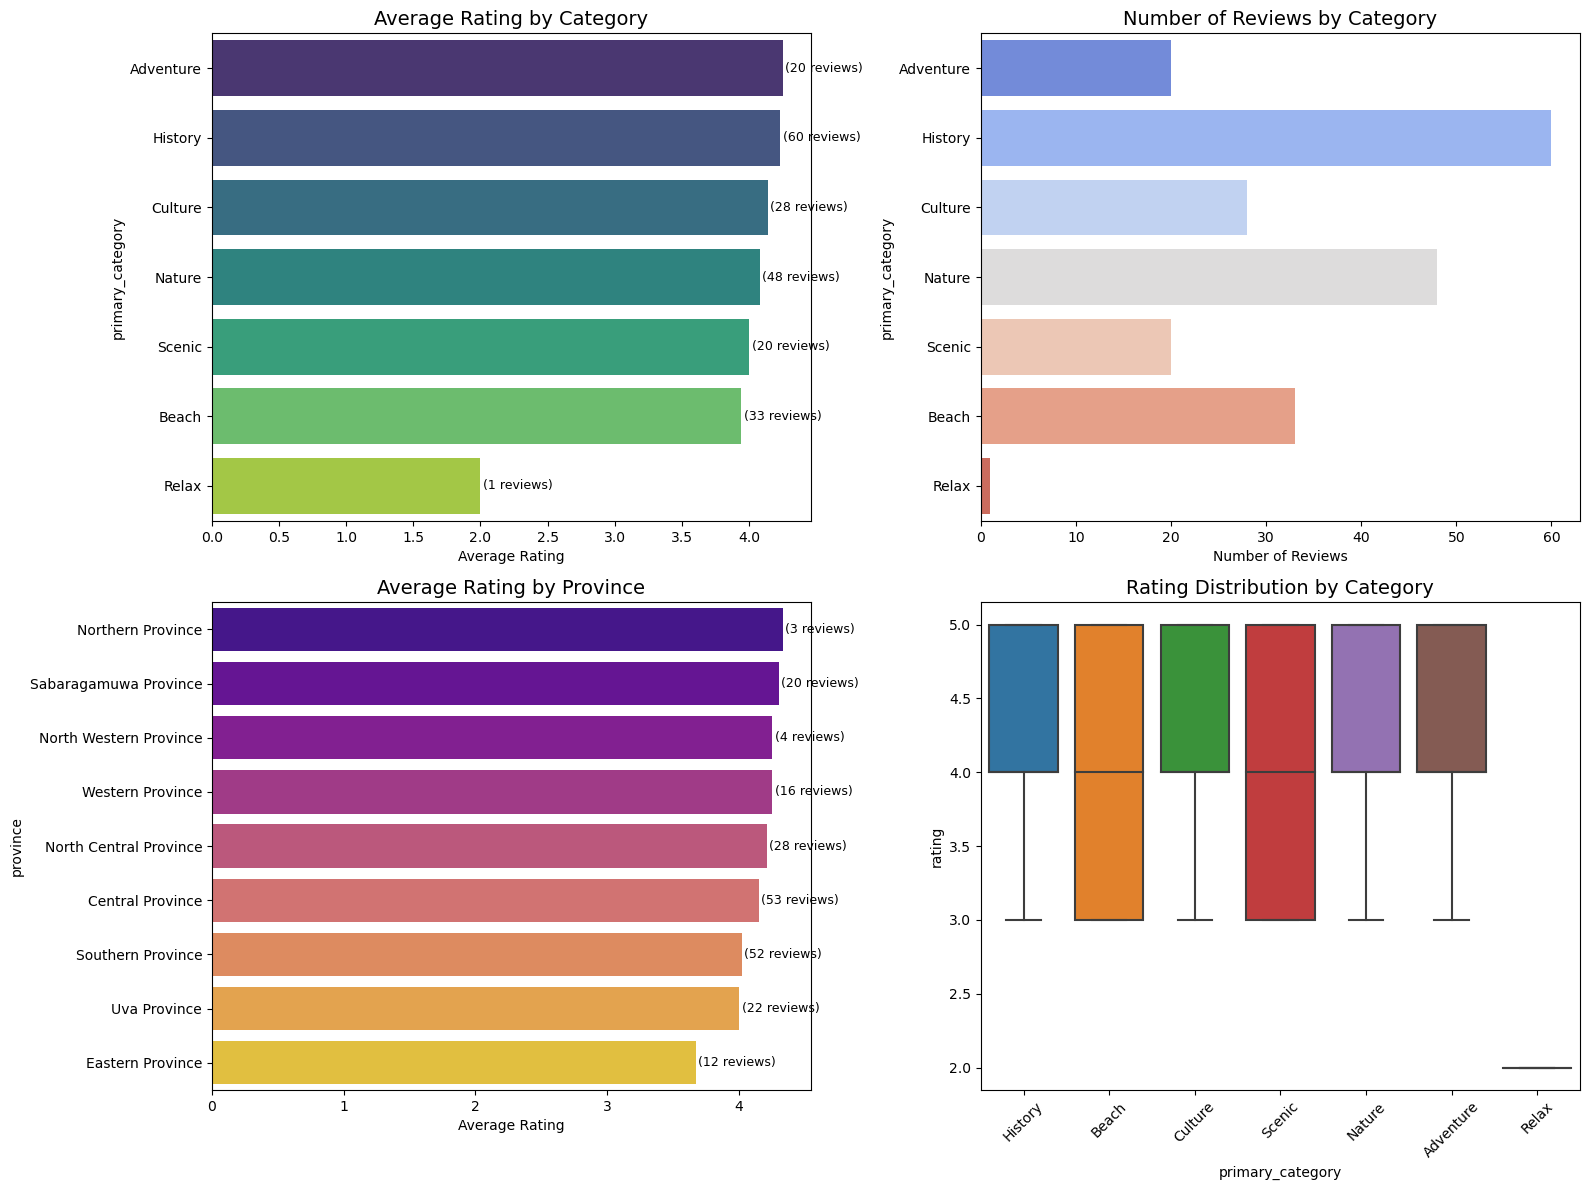

🎯 CATEGORY PERFORMANCE:
   • Adventure: 4.25 avg rating (20 reviews)
   • History: 4.23 avg rating (60 reviews)
   • Culture: 4.14 avg rating (28 reviews)
   • Nature: 4.08 avg rating (48 reviews)
   • Scenic: 4.00 avg rating (20 reviews)
   • Beach: 3.94 avg rating (33 reviews)
   • Relax: 2.00 avg rating (1 reviews)

🗺️ PROVINCE PERFORMANCE:
   • Northern Province: 4.33 avg rating (3 reviews)
   • Sabaragamuwa Province: 4.30 avg rating (20 reviews)
   • North Western Province: 4.25 avg rating (4 reviews)
   • Western Province: 4.25 avg rating (16 reviews)
   • North Central Province: 4.21 avg rating (28 reviews)
   • Central Province: 4.15 avg rating (53 reviews)
   • Southern Province: 4.02 avg rating (52 reviews)
   • Uva Province: 4.00 avg rating (22 reviews)
   • Eastern Province: 3.67 avg rating (12 reviews)


In [ ]:
# Category and Province analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average rating by category
category_ratings = location_reviews.groupby('primary_category')['rating'].agg(['mean', 'count']).round(2)
category_ratings = category_ratings.sort_values('mean', ascending=False)
sns.barplot(x=category_ratings['mean'], y=category_ratings.index, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Average Rating by Category', fontsize=14)
axes[0,0].set_xlabel('Average Rating')

# Add review count annotations
for i, (idx, row) in enumerate(category_ratings.iterrows()):
    axes[0,0].text(row['mean'] + 0.02, i, f'({int(row["count"])} reviews)', va='center', fontsize=9)

# 2. Review volume by category
sns.barplot(x=category_ratings['count'], y=category_ratings.index, ax=axes[0,1], palette='coolwarm')
axes[0,1].set_title('Number of Reviews by Category', fontsize=14)
axes[0,1].set_xlabel('Number of Reviews')

# 3. Average rating by province
province_ratings = location_reviews.groupby('province')['rating'].agg(['mean', 'count']).round(2)
province_ratings = province_ratings.sort_values('mean', ascending=False)
sns.barplot(x=province_ratings['mean'], y=province_ratings.index, ax=axes[1,0], palette='plasma')
axes[1,0].set_title('Average Rating by Province', fontsize=14)
axes[1,0].set_xlabel('Average Rating')

# Add review count annotations
for i, (idx, row) in enumerate(province_ratings.iterrows()):
    axes[1,0].text(row['mean'] + 0.02, i, f'({int(row["count"])} reviews)', va='center', fontsize=9)

# 4. Box plot of ratings by category
sns.boxplot(data=location_reviews, x='primary_category', y='rating', ax=axes[1,1])
axes[1,1].set_title('Rating Distribution by Category', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print category insights
print("🎯 CATEGORY PERFORMANCE:")
for category, stats in category_ratings.iterrows():
    print(f"   • {category}: {stats['mean']:.2f} avg rating ({int(stats['count'])} reviews)")

print(f"\n🗺️ PROVINCE PERFORMANCE:")
for province, stats in province_ratings.iterrows():
    print(f"   • {province}: {stats['mean']:.2f} avg rating ({int(stats['count'])} reviews)")

### 4.5 Reviews vs Location Attributes Correlation

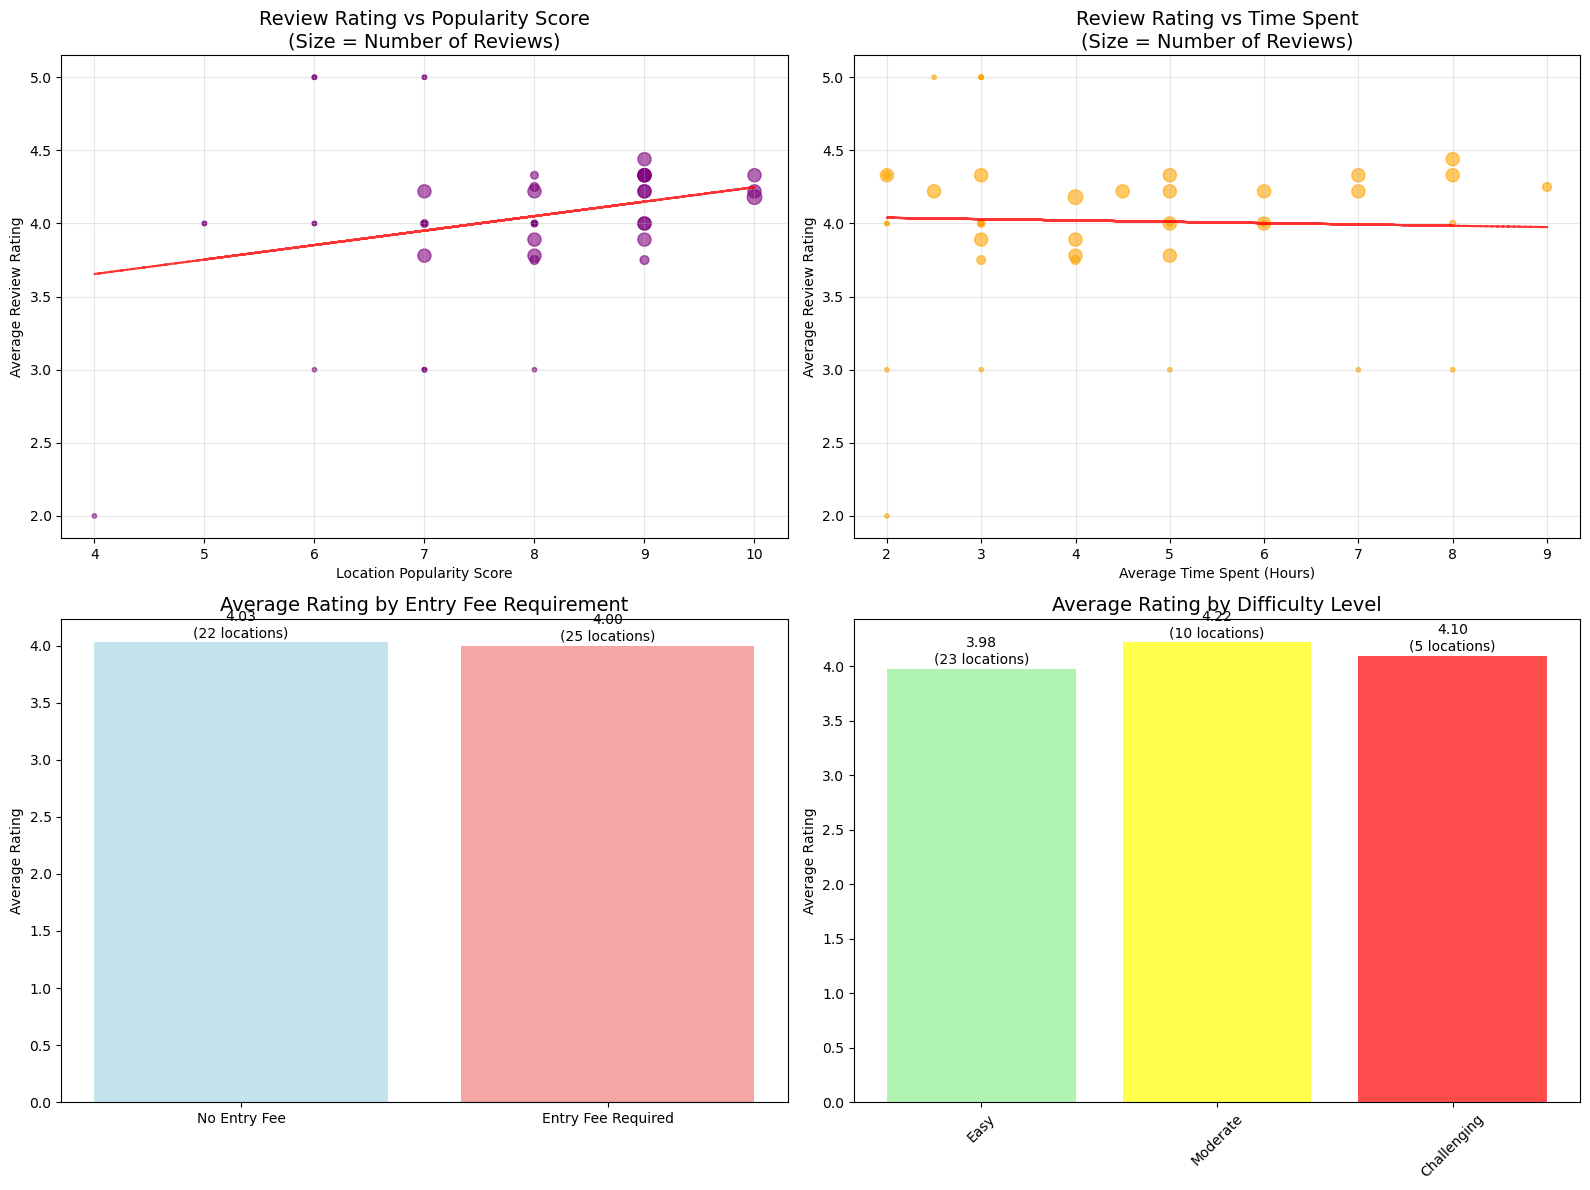

🔗 CORRELATION INSIGHTS:
   • Review Rating vs Popularity Score: 0.235
   • Review Rating vs Time Spent: -0.031
   • Locations with entry fees: 4.00 avg rating
   • Locations without entry fees: 4.03 avg rating


In [ ]:
# Correlation analysis between reviews and location attributes
# Merge location stats with location data
location_analysis = location_stats.merge(df, on='location_id', how='inner')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average rating vs Popularity score
axes[0,0].scatter(location_analysis['popularity_score'], location_analysis['avg_rating'], 
                 s=location_analysis['review_count']*10, alpha=0.6, color='purple')
axes[0,0].set_xlabel('Location Popularity Score')
axes[0,0].set_ylabel('Average Review Rating')
axes[0,0].set_title('Review Rating vs Popularity Score\n(Size = Number of Reviews)', fontsize=14)
axes[0,0].grid(True, alpha=0.3)

# Add trend line
if len(location_analysis) > 1:
    z = np.polyfit(location_analysis['popularity_score'], location_analysis['avg_rating'], 1)
    p = np.poly1d(z)
    axes[0,0].plot(location_analysis['popularity_score'], p(location_analysis['popularity_score']), "r--", alpha=0.8)

# 2. Average rating vs Time spent
axes[0,1].scatter(location_analysis['avg_time_hours'], location_analysis['avg_rating'], 
                 s=location_analysis['review_count']*10, alpha=0.6, color='orange')
axes[0,1].set_xlabel('Average Time Spent (Hours)')
axes[0,1].set_ylabel('Average Review Rating')
axes[0,1].set_title('Review Rating vs Time Spent\n(Size = Number of Reviews)', fontsize=14)
axes[0,1].grid(True, alpha=0.3)

# Add trend line
if len(location_analysis) > 1:
    z = np.polyfit(location_analysis['avg_time_hours'], location_analysis['avg_rating'], 1)
    p = np.poly1d(z)
    axes[0,1].plot(location_analysis['avg_time_hours'], p(location_analysis['avg_time_hours']), "r--", alpha=0.8)

# 3. Entry fee vs Average rating
entry_fee_ratings = location_analysis.groupby('entry_fee_required')['avg_rating'].agg(['mean', 'count']).round(2)
entry_fee_labels = ['No Entry Fee', 'Entry Fee Required']
axes[1,0].bar(entry_fee_labels, entry_fee_ratings['mean'], 
              color=['lightblue', 'lightcoral'], alpha=0.7)
axes[1,0].set_ylabel('Average Rating')
axes[1,0].set_title('Average Rating by Entry Fee Requirement', fontsize=14)

# Add count annotations
for i, (mean_val, count_val) in enumerate(zip(entry_fee_ratings['mean'], entry_fee_ratings['count'])):
    axes[1,0].text(i, mean_val + 0.02, f'{mean_val:.2f}\n({int(count_val)} locations)', 
                   ha='center', va='bottom')

# 4. Difficulty vs Average rating
difficulty_ratings = location_analysis.groupby('difficulty')['avg_rating'].agg(['mean', 'count']).round(2)
difficulty_order = ['Easy', 'Moderate', 'Challenging', 'N/A']
difficulty_ratings_ordered = difficulty_ratings.reindex(difficulty_order).dropna()

axes[1,1].bar(difficulty_ratings_ordered.index, difficulty_ratings_ordered['mean'], 
              color=['lightgreen', 'yellow', 'red', 'gray'], alpha=0.7)
axes[1,1].set_ylabel('Average Rating')
axes[1,1].set_title('Average Rating by Difficulty Level', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)

# Add count annotations
for i, (idx, row) in enumerate(difficulty_ratings_ordered.iterrows()):
    axes[1,1].text(i, row['mean'] + 0.02, f'{row["mean"]:.2f}\n({int(row["count"])} locations)', 
                   ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate correlations
correlation_popularity = np.corrcoef(location_analysis['popularity_score'], location_analysis['avg_rating'])[0,1]
correlation_time = np.corrcoef(location_analysis['avg_time_hours'], location_analysis['avg_rating'])[0,1]

print("🔗 CORRELATION INSIGHTS:")
print(f"   • Review Rating vs Popularity Score: {correlation_popularity:.3f}")
print(f"   • Review Rating vs Time Spent: {correlation_time:.3f}")
print(f"   • Locations with entry fees: {entry_fee_ratings.loc[True, 'mean']:.2f} avg rating")
print(f"   • Locations without entry fees: {entry_fee_ratings.loc[False, 'mean']:.2f} avg rating")

### 4.8 Review Summary and Recommendations

In [ ]:
# Calculate missing variables needed for summary
category_ratings = reviews_df.merge(df[['location_id', 'primary_category']], on='location_id').groupby('primary_category')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)
province_ratings = reviews_df.merge(df[['location_id', 'province']], on='location_id').groupby('province')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# Comprehensive review summary and recommendations
print("🌟 COMPREHENSIVE REVIEW ANALYSIS SUMMARY 🌟")
print("=" * 70)

# Overall statistics
print(f"📊 OVERALL REVIEW STATISTICS:")
print(f"   • Total Reviews: {len(reviews_df)}")
print(f"   • Average Rating: {reviews_df['rating'].mean():.2f}/5.0")
print(f"   • Locations Reviewed: {reviews_df['location_id'].nunique()}/{len(df)} ({reviews_df['location_id'].nunique()/len(df)*100:.1f}%)")
print(f"   • Active Users: {reviews_df['user_id'].nunique()}")
print(f"   • Reviews per Location: {len(reviews_df)/reviews_df['location_id'].nunique():.1f}")

# Top performers
most_popular_reviewed = location_stats.nlargest(1, 'review_count')
highest_rated_location = location_stats[location_stats['review_count'] >= 3].nlargest(1, 'avg_rating')

print(f"\n🏆 TOP PERFORMING LOCATIONS:")
print(f"   • Most Reviewed: {most_popular_reviewed.iloc[0]['name']} ({most_popular_reviewed.iloc[0]['review_count']} reviews)")
print(f"   • Highest Rated (≥3 reviews): {highest_rated_location.iloc[0]['name']} ({highest_rated_location.iloc[0]['avg_rating']:.2f} rating)")

# Category and province performance
best_category = category_ratings.index[0]
best_province = province_ratings.index[0]

print(f"\n🎯 CATEGORY & PROVINCE PERFORMANCE:")
print(f"   • Best Rated Category: {best_category} ({category_ratings.loc[best_category, 'mean']:.2f} avg rating)")
print(f"   • Best Rated Province: {best_province} ({province_ratings.loc[best_province, 'mean']:.2f} avg rating)")

# Review quality insights
print(f"\n💎 REVIEW QUALITY INSIGHTS:")
high_quality_locations = location_analysis[location_analysis['review_quality_score'] >= location_analysis['review_quality_score'].quantile(0.8)]
consistent_locations = location_analysis[location_analysis['rating_std'] <= 0.5]

print(f"   • High Quality Locations (top 20%): {len(high_quality_locations)}")
print(f"   • Highly Consistent Locations (std ≤ 0.5): {len(consistent_locations)}")
print(f"   • Locations with 100% satisfaction: {len(satisfaction_stats[satisfaction_stats['satisfaction_rate'] == 100])}")

# User engagement
active_users_5plus = user_stats[user_stats['reviews_given'] >= 5]
print(f"\n👥 USER ENGAGEMENT:")
print(f"   • Highly Active Users (≥5 reviews): {len(active_users_5plus)} ({len(active_users_5plus)/len(user_stats)*100:.1f}%)")
print(f"   • Average User Rating Severity: {user_stats['avg_rating_given'].mean():.2f}")

# Recommendations
print(f"\n💡 KEY RECOMMENDATIONS:")

# Find underperforming locations
underperforming = location_analysis[
    (location_analysis['avg_rating'] < 3.5) & 
    (location_analysis['review_count'] >= 3)
]

# Find hidden gems (high rating, low review count)
hidden_gems = location_analysis[
    (location_analysis['avg_rating'] >= 4.5) & 
    (location_analysis['review_count'] <= 3)
]

# Find popular but declining
if len(trend_analysis) > 0:
    popular_declining = trend_analysis[
        (trend_analysis['rating_change'] < -0.2) & 
        (location_analysis['review_count'] >= 5)
    ]
    
    print(f"   • Focus on {len(underperforming)} underperforming locations (avg rating < 3.5)")
    print(f"   • Promote {len(hidden_gems)} hidden gems (high rating, few reviews)")
    print(f"   • Investigate {len(popular_declining)} popular locations showing decline")
else:
    print(f"   • Focus on {len(underperforming)} underperforming locations (avg rating < 3.5)")
    print(f"   • Promote {len(hidden_gems)} hidden gems (high rating, few reviews)")

# Entry fee insights
free_vs_paid = location_analysis.groupby('entry_fee_required')['avg_rating'].mean()
if True in free_vs_paid.index and False in free_vs_paid.index:
    fee_difference = free_vs_paid[False] - free_vs_paid[True]
    if fee_difference > 0.1:
        print(f"   • Free locations rate {fee_difference:.2f} points higher than paid ones")
    elif fee_difference < -0.1:
        print(f"   • Paid locations rate {abs(fee_difference):.2f} points higher than free ones")

print(f"\n🎉 Overall Assessment: Sri Lankan tourism locations show strong performance with {((reviews_df['rating'] >= 4).sum() / len(reviews_df) * 100):.1f}% of reviews being 4-5 stars!")
print("=" * 70)

🌟 COMPREHENSIVE REVIEW ANALYSIS SUMMARY 🌟
📊 OVERALL REVIEW STATISTICS:
   • Total Reviews: 300
   • Average Rating: 4.10/5.0
   • Locations Reviewed: 97/50 (194.0%)
   • Active Users: 300
   • Reviews per Location: 3.1

🏆 TOP PERFORMING LOCATIONS:
   • Most Reviewed: Sigiriya Rock (11 reviews)
   • Highest Rated (≥3 reviews): nan (4.50 rating)

🎯 CATEGORY & PROVINCE PERFORMANCE:
   • Best Rated Category: Adventure (4.25 avg rating)
   • Best Rated Province: Northern Province (4.33 avg rating)

💎 REVIEW QUALITY INSIGHTS:
   • High Quality Locations (top 20%): 20
   • Highly Consistent Locations (std ≤ 0.5): 7
   • Locations with 100% satisfaction: 17

👥 USER ENGAGEMENT:
   • Highly Active Users (≥5 reviews): 0 (0.0%)
   • Average User Rating Severity: 4.10

💡 KEY RECOMMENDATIONS:
   • Focus on 0 underperforming locations (avg rating < 3.5)
   • Promote 18 hidden gems (high rating, few reviews)
   • Investigate 5 popular locations showing decline

🎉 Overall Assessment: Sri Lankan tourism

C:\Users\Perera\AppData\Local\Temp\ipykernel_24832\2503077133.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  popular_declining = trend_analysis[
